#**STAGE 1**

# 1.1 Load Dataset

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




# 1.2 Import Libraries


In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [4]:
od.download("https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aedentrisayp
Your Kaggle Key: ··········


100%|██████████| 46.4M/46.4M [00:00<00:00, 125MB/s]


In [5]:
file=('/content/should-this-loan-be-approved-or-denied/SBAnational.csv')

In [6]:
df = pd.read_csv(file,low_memory=False)
pd.set_option('display.max_columns', None)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


# 1.3 Descriptive Statistics

## 1.3.1 Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?





### 1.3.1.1 Tipe data yang kurang sesuai

*   Tipe data `DisbursementGross`, `BalanceGross`, `ChgOffPrinGr`, `GrAppv`, `SBA_Appv`, dan `ApprovalFY` seharusnya **float** karena merupakan nominal angka
*   Tipe data `Zip` dan `UrbanRural` seharusnya **string** karena walaupun bentuk value nya angka, tetapi tidak dapat digunakan untuk proses perhitungan
*   Tipe data `NewExist` seharusnya **integer** karena termasuk binari

Tipe data akan disesuaikan pada stage 1 ini untuk memudahkan proses pengerjaan berikutnya


#### 1.3.1.1.1 Cek tipe data setiap feature

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [8]:
df['NewExist'].value_counts()

1.0    644869
2.0    253125
0.0      1034
Name: NewExist, dtype: int64

#### 1.3.1.1.2 Mengecek apakah ada data yang terduplikasi

In [9]:
df.duplicated().sum()

0

####1.3.1.1.3 Perubahan Tipe Data



Memisahkan kolom `ApprovalDate`, `ChgOffDate`, `DisbursementDate` berdasarkan tahun, bulan, dan hari

In [10]:
df = pd.read_csv(file,low_memory=False)
pd.set_option('display.max_columns', None)

df_copy = df.copy()

In [11]:
df_copy[['ApprovalDate','ChgOffDate','DisbursementDate']]=df_copy[['ApprovalDate','ChgOffDate','DisbursementDate']].apply(pd.to_datetime)
df_copy

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,1,0,N,Y,NaT,1999-02-28,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,1,0,N,Y,NaT,1997-05-31,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.0,0,0,1,0,N,N,NaT,1997-12-31,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,1,0,N,Y,NaT,1997-06-30,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,1,0,N,N,NaT,1997-05-14,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997-02-27,1997,60,6,1.0,0,0,1,0,0,N,NaT,1997-09-30,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,60,6,1.0,0,0,1,0,Y,N,NaT,1997-10-31,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997,108,26,1.0,0,0,1,0,N,N,NaT,1997-09-30,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,60,6,1.0,0,0,1,0,N,Y,2000-03-08,1997-03-31,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


######1.3.1.1.3.1 Kolom `ApprovalDate`

In [12]:
df_copy['ApprovalYear'] = pd.DatetimeIndex(df_copy['ApprovalDate']).year
print (df_copy['ApprovalYear'].min())
print (df_copy['ApprovalYear'].max())

1972
2071


In [13]:
df_copy['ApprovalMonth'] = pd.DatetimeIndex(df_copy['ApprovalDate']).month
print (df_copy['ApprovalMonth'].min())
print (df_copy['ApprovalMonth'].max())

1
12


In [14]:
df_copy['ApprovalDay'] = pd.DatetimeIndex(df_copy['ApprovalDate']).day
print (df_copy['ApprovalDay'].min())
print (df_copy['ApprovalDay'].max())

1
31


In [15]:
df_copy[['ApprovalYear','ApprovalMonth','ApprovalDay']].sample(5)

,ApprovalYear,ApprovalMonth,ApprovalDay
358558,1999,12,28
496886,2001,8,10
42994,1997,6,10
592067,2002,11,8
647494,2003,7,10


######1.3.1.1.3.2 Kolom `ChgOffDate`

In [16]:
df_copy['ChgOffYear'] = pd.DatetimeIndex(df_copy['ChgOffDate']).year
print (df_copy['ChgOffYear'].min())
print (df_copy['ChgOffYear'].max())

1988.0
2026.0


In [17]:
df_copy

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,ApprovalYear,ApprovalMonth,ApprovalDay,ChgOffYear
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,1,0,N,Y,NaT,1999-02-28,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",1997,2,28,NaN
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,1,0,N,Y,NaT,1997-05-31,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",1997,2,28,NaN
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.0,0,0,1,0,N,N,NaT,1997-12-31,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00",1997,2,28,NaN
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,1,0,N,Y,NaT,1997-06-30,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00",1997,2,28,NaN
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,1,0,N,N,NaT,1997-05-14,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00",1997,2,28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997-02-27,1997,60,6,1.0,0,0,1,0,0,N,NaT,1997-09-30,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00",1997,2,27,NaN
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,60,6,1.0,0,0,1,0,Y,N,NaT,1997-10-31,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00",1997,2,27,NaN
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997,108,26,1.0,0,0,1,0,N,N,NaT,1997-09-30,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00",1997,2,27,NaN
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,60,6,1.0,0,0,1,0,N,Y,2000-03-08,1997-03-31,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00",1997,2,27,2000.0


In [18]:
df['ChgOffPrinGr'].value_counts()

$0.00           737152
$50,000.00        2110
$10,000.00        1865
$25,000.00        1371
$35,000.00        1345
                 ...  
$29,982.00           1
$568,599.00          1
$142,721.00          1
$893,162.00          1
$124,847.00          1
Name: ChgOffPrinGr, Length: 83165, dtype: int64

In [19]:
df_copy['ChgOffMonth'] = pd.DatetimeIndex(df_copy['ChgOffDate']).month
print (df_copy['ChgOffMonth'].min())
print (df_copy['ChgOffMonth'].max())

1.0
12.0


In [20]:
df_copy['ChgOffDay'] = pd.DatetimeIndex(df_copy['ChgOffDate']).day
print (df_copy['ChgOffDay'].min())
print (df_copy['ChgOffDay'].max())

1.0
31.0


In [21]:
df_copy[['ChgOffYear','ChgOffMonth','ChgOffDay']].tail(5)

,ChgOffYear,ChgOffMonth,ChgOffDay
899159,NaN,NaN,NaN
899160,NaN,NaN,NaN
899161,NaN,NaN,NaN
899162,2000.0,3.0,8.0
899163,NaN,NaN,NaN


#####1.3.1.1.3.3 Kolom `Disbursement Date`

In [22]:
df_copy['DisbursementYear'] = pd.DatetimeIndex(df_copy['DisbursementDate']).year
print (df_copy['DisbursementYear'].min())
print (df_copy['DisbursementYear'].max())

1972.0
2071.0


In [23]:
df_copy['DisbursementMonth'] = pd.DatetimeIndex(df_copy['DisbursementDate']).month
print (df_copy['DisbursementMonth'].min())
print (df_copy['DisbursementMonth'].max())

1.0
12.0


In [24]:
df_copy['DisbursementDay'] = pd.DatetimeIndex(df_copy['DisbursementDate']).day
print (df_copy['DisbursementDay'].min())
print (df_copy['DisbursementDay'].max())

1.0
31.0


In [25]:
df_copy[['DisbursementYear','DisbursementMonth','DisbursementDay']].sample(5)

,DisbursementYear,DisbursementMonth,DisbursementDay
110668,1998.0,4.0,30.0
822134,2005.0,6.0,30.0
40219,2005.0,5.0,31.0
77670,2005.0,12.0,31.0
254229,2007.0,11.0,30.0


In [26]:
df_copy[['DisbursementYear','ChgOffYear','ApprovalYear']].sort_values('ApprovalYear', ascending= 'True').tail(10)

,DisbursementYear,ChgOffYear,ApprovalYear
38437,1972.0,1989.0,2071
820902,2071.0,1989.0,2071
774035,NaN,1990.0,2071
20250,1972.0,1997.0,2071
22206,1972.0,1989.0,2071
750426,2071.0,1991.0,2071
805754,2071.0,1991.0,2071
820949,2071.0,1991.0,2071
839161,2071.0,1992.0,2071
7454,2071.0,1991.0,2071


Berdasarkan analisis di atas, untuk data tanggal dan bulan dari setiap feature '**Date**' sudah aman dan tidak ada kesalahan. Namun, pada bagian '**Year**' terdapat beberapa kejanggalan, pada `DisbursementYear` dan `ApprovalYear` nilai max nya adalah 2071, tetapi dalam beberapa data `ChgOffYear` nya adalah 1989 dimana hal ini tidak masuk di akal. Oleh karena itu, perlu dilakukan sesuatu treatmen pada data pre-processing.

Mengubah kolom `DisbursementGross`, `BalanceGross`, `ChgOffPrinGr`, `GrAppv`, `SBA_Appv` menjadi float

In [27]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"


In [28]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']]=df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.replace('$', '').replace(',', ''))
df=df.astype({'DisbursementGross':'float', 'BalanceGross':'float', 'ChgOffPrinGr':'float', 'GrAppv':'float', 'SBA_Appv':'float'})
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0


In [29]:
df_copy[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']]=df_copy[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.replace('$', '').replace(',', ''))
df_copy=df_copy.astype({'DisbursementGross':'float', 'BalanceGross':'float', 'ChgOffPrinGr':'float', 'GrAppv':'float', 'SBA_Appv':'float'})
df_copy[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0


In [30]:
df_copy

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,ApprovalYear,ApprovalMonth,ApprovalDay,ChgOffYear,ChgOffMonth,ChgOffDay,DisbursementYear,DisbursementMonth,DisbursementDay
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,1,0,N,Y,NaT,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0,1997,2,28,NaN,NaN,NaN,1999.0,2.0,28.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,1,0,N,Y,NaT,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0,1997,2,28,NaN,NaN,NaN,1997.0,5.0,31.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.0,0,0,1,0,N,N,NaT,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0,1997,2,28,NaN,NaN,NaN,1997.0,12.0,31.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,1,0,N,Y,NaT,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0,1997,2,28,NaN,NaN,NaN,1997.0,6.0,30.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,1,0,N,N,NaT,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0,1997,2,28,NaN,NaN,NaN,1997.0,5.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997-02-27,1997,60,6,1.0,0,0,1,0,0,N,NaT,1997-09-30,70000.0,0.0,P I F,0.0,70000.0,56000.0,1997,2,27,NaN,NaN,NaN,1997.0,9.0,30.0
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,60,6,1.0,0,0,1,0,Y,N,NaT,1997-10-31,85000.0,0.0,P I F,0.0,85000.0,42500.0,1997,2,27,NaN,NaN,NaN,1997.0,10.0,31.0
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997,108,26,1.0,0,0,1,0,N,N,NaT,1997-09-30,300000.0,0.0,P I F,0.0,300000.0,225000.0,1997,2,27,NaN,NaN,NaN,1997.0,9.0,30.0
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,60,6,1.0,0,0,1,0,N,Y,2000-03-08,1997-03-31,75000.0,0.0,CHGOFF,46383.0,75000.0,60000.0,1997,2,27,2000.0,3.0,8.0,1997.0,3.0,31.0


In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  int64         
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  int64         
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  int64         
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  object        
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  float64       
 13  CreateJob          899164 non-null  int64   

In [32]:
df_copy = df_copy[(df_copy['ChgOffPrinGr'] > 0)]

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162012 entries, 6 to 899162
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      162012 non-null  int64         
 1   Name               162011 non-null  object        
 2   City               162012 non-null  object        
 3   State              162009 non-null  object        
 4   Zip                162012 non-null  int64         
 5   Bank               161891 non-null  object        
 6   BankState          161889 non-null  object        
 7   NAICS              162012 non-null  int64         
 8   ApprovalDate       162012 non-null  datetime64[ns]
 9   ApprovalFY         162012 non-null  object        
 10  Term               162012 non-null  int64         
 11  NoEmp              162012 non-null  int64         
 12  NewExist           161998 non-null  float64       
 13  CreateJob          162012 non-null  int64   

In [34]:
dfset1=df_copy.groupby('ChgOffYear').agg({'LoanNr_ChkDgt':'count', 'DisbursementGross':'mean', 'ChgOffPrinGr':'mean','Term':'mean','SBA_Appv':'mean'}).reset_index()
dfset1

,ChgOffYear,LoanNr_ChkDgt,DisbursementGross,ChgOffPrinGr,Term,SBA_Appv
0,1988.0,344,153427.529070,87295.375000,101.793605,132857.034884
1,1989.0,1465,165841.281911,103146.565188,97.204778,144878.763823
2,1990.0,1544,178882.975389,103905.474741,93.987047,154494.275259
3,1991.0,2208,183898.121377,109285.880888,91.158514,156643.349185
4,1992.0,726,191117.544077,106744.698347,96.918733,164291.389807
5,1993.0,598,206221.515050,107012.344482,99.165552,173043.526756
6,1994.0,444,219764.601351,122144.997748,101.549550,182877.846847
7,1995.0,356,214899.022472,112144.019663,100.087079,177186.132022
8,1996.0,477,225128.329140,123475.777778,106.979036,185282.354298
9,1997.0,575,207814.295652,111504.880000,97.026087,171839.196522


In [35]:
dfset1['DisbursementGross'].mean()

172866.4405820577

In [36]:
dfset1['ChgOffPrinGr'].mean()

100698.5027990437

In [37]:
dfset1['Term'].max()

106.979035639413

In [38]:
dfset1['SBA_Appv'].mean()

130825.81303684495

Mengubah kolom `ApprovalFY` menjadi datetime (year)



In [39]:
df['ApprovalFY'].apply(type).value_counts()

<class 'str'>    899164
Name: ApprovalFY, dtype: int64

In [40]:
df['ApprovalFY'].unique()

array(['1997', '1980', '2006', '1998', '1999', '2000', '2001', '1972',
       '2003', '2004', '1978', '1979', '1981', '2005', '1962', '1982',
       '1965', '1966', '1983', '1973', '1984', '2007', '1985', '1986',
       '1987', '2008', '1988', '2009', '1989', '1991', '1990', '1974',
       '2010', '1967', '2011', '1992', '1993', '2002', '2012', '2013',
       '1994', '2014', '1975', '1977', '1976', '1968', '1976A', '1969',
       '1995', '1970', '1996', '1971'], dtype=object)

Dalam data di atas terdapat tipe data integer dan string. Dimana contoh value dari tipe data string adalah '1976A', karena itu pertama-tama kita perlu menghilangkan huruf A terlebih dahulu kemudian mengubah tipe datanya menjadi integer




In [41]:
def clean_str(x):
    if isinstance(x,str):
        return x.replace('A','')
    return x
df['ApprovalFY']=df['ApprovalFY'].apply(clean_str).astype('int')
df['ApprovalFY'].apply(type).value_counts()

<class 'int'>    899164
Name: ApprovalFY, dtype: int64

Mengubah kolom `UrbanRural`, `Zip` menjadi string

In [42]:
df['UrbanRural']=df['UrbanRural'].astype('str')
df['Zip']=df['Zip'].astype('str')

###1.3.1.2 Value yang kurang sesuai
*   Pada kolom `NewExist`, value seharusnya bernilai **1 atau 0** saja karena bentuknya binari sehingga melambangkan 'ya' atau 'tidak'
*   Pada kolom `ApprovalFY` terdapat **value string yang kurang tepat (1976A)** sehingga harus diubah dengan mennghilangkan huruf A'
*   Pada kolom `UrbanRural` terdapat value yang kurang tepat seharusnya hanya terdiri dari dua kategori 'Urban' dan 'Rural'. Terdapat satu kategori lainnya yakni **'Undefined'**
*   Pada  kolom `RevLineCr` dan `LowDoc` terdapat value yang tidak sesuai, seharusnya value bernilai **'Y' dan 'N' yang melambangkan 'Yes' dan 'No'** saja
*   Pada kolom `MIS_Status`, value dapat diubah **menjadi 1 atau 0 sehingga bentuknya binari**
* Pada kolom `DisbursementDate` dan `AppprovalDate` terdapat value tanggal yang tidak sesuai misalnya **tahun '2071'** dimana data ini seharusnya hanya memiliki value tahun sampai **tahun '2010'** saja
*   Pada kolom `NAICS`, terdapat terlalu banyak unique value dari kode yang tidak beraturan. Oleh karena itu, perlu mengambil **2 kode awal **lalu cocokan dengan industri yang mereka miliki


####1.3.1.2.1 Cek value feature yang kurang sesuai

In [43]:
#Value pada kolom `RevLineCr`selain 'Y' dan 'N'
perc_RevLineCr = len(df[~df['RevLineCr'].isin(['Y','N']) ]) / len(df['RevLineCr'] ) * 100
print("Terdapat value lain yang tidak sesuai dengan 'Y' dan 'N' sebanyak", perc_RevLineCr, '%')

Terdapat value lain yang tidak sesuai dengan 'Y' dan 'N' sebanyak 30.859665200119224 %


In [44]:
#Perubahan balue pada kolom `RevLineCr`selain 'Y' dan 'N'
df['RevLineCr']=df['RevLineCr']
m = (~df['RevLineCr'].isin(['Y','N']) )
df.loc[m, 'RevLineCr'] = np.nan

In [45]:
#Value pada kolom `LowDoc`selain 'Y' dan 'N'
perc_LowDoc = len(df[~df['LowDoc'].isin(['Y','N']) ]) / len(df['LowDoc'] ) * 100
print("Terdapat value lain yang tidak sesuai dengan 'Y' dan 'N' sebanyak", perc_LowDoc, '%')

Terdapat value lain yang tidak sesuai dengan 'Y' dan 'N' sebanyak 0.6680650026024174 %


In [46]:
#Perubahan balue pada kolom `LowDoc`selain 'Y' dan 'N' 
df['LowDoc']=df['LowDoc']
m = (~df['LowDoc'].isin(['Y','N']) )
df.loc[m, 'LowDoc'] = np.nan

In [47]:
#Value pada kolom `NewExist`selain '1.0' ('Existing business') dan '2.0' ('New business')
perc_NewExist = len(df[~df['NewExist'].isin([1.0,2.0]) ]) / len(df['NewExist'] ) * 100
print("Terdapat value lain yang tidak sesuai dengan '1.0' dan '2.0' sebanyak", perc_NewExist, '%')

Terdapat value lain yang tidak sesuai dengan '1.0' dan '2.0' sebanyak 0.13012086782833834 %


In [48]:
#Perubahan balue pada kolom `NewExist`selain '1.0' dan '2.0' 
df['NewExist']=df['NewExist']
m = (~df['NewExist'].isin([1.0,2.0]) )
df.loc[m, 'NewExist'] = np.nan

In [49]:
df['NewExist'].value_counts()

1.0    644869
2.0    253125
Name: NewExist, dtype: int64

In [50]:
#Value pada kolom `UrbanRural` selain '1' ('Urban') dan '2' ('Rural')
perc_UrbanRural = len(df[~df['UrbanRural'].isin([1,2]) ]) / len(df['UrbanRural'] ) * 100

print("Terdapat value lain yang tidak sesuai dengan '1' dan '2' sebanyak", perc_UrbanRural, '%')

Terdapat value lain yang tidak sesuai dengan '1' dan '2' sebanyak 100.0 %


In [51]:
#Perubahan balue pada kolom `NewExist`selain '1' dan '2' 
df['UrbanRural']=df['UrbanRural']
m = (~df['UrbanRural'].isin(['1','2']) )
df.loc[m, 'UrbanRural'] = np.nan

In [52]:
df['UrbanRural'].value_counts()

1    470654
2    105343
Name: UrbanRural, dtype: int64

In [53]:
#Value tidak make sense, tahun pada ApprovalDate dan Disbursement Date '2071' sehingga secara logika tidak sesuai dengan dataset kita yang meneliti loan tahun 1984-2010
df[df['DisbursementDate']>='2020-01-01'].shape

(790349, 27)

#### 1.3.1.2.2  Perubahan beberapa value yang tidak sesuai

Mengubah kode `NAICS` menjadi industri agar lebih mudah pada proses business insight

In [54]:
df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])

In [55]:
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})
df['Industry'].value_counts()

Retail_trade                127251
Other_no_pub                 72618
Prof/Science/Tech            68170
Manufacturing                68029
Accom/Food_serv              67600
Construction                 66646
Healthcare/Social_assist     55366
Wholesale_trade              48743
Admin_sup/Waste_Mgmt_Rem     32685
Trans/Ware                   22531
Arts/Entertain/Rec           14640
RE/Rental/Lease              13632
Information                  11379
Finance/Insurance             9496
Ag/For/Fish/Hunt              9005
Educational                   6425
Min/Quar/Oil_Gas_ext          1851
Utilities                      663
Mgmt_comp                      257
Public_Admin                   229
Name: Industry, dtype: int64

In [56]:
#Menghapus kolom 'NAICS' karena sudah ada kolom 'Industry'
df.drop('NAICS', inplace=True, axis=1)

**Kesimpulan A:**
- Tipe data yang tidak sesuai sudah diubah pada stage 1 untuk memudahkan Data Scientist melakukan pengolahan data
- Terdapat beberapa value yang kurang sesuai, terutama dalam feature `LowDoc, RevLineCr, UrbanRural,dan NewExist` sehingga kami perlu untuk menyaringnya pada stage 2
- Terdapat value `ApprovalYear dan DisbursementYear` yang tidak masuk akal sehingga kami merekomendasikan untuk melakukan sesuatu pada stage 2
- Feature `RevLineCr, dan UrbanRural` memiliki missing value diatas 20%, `RevLineCr`sebanyak 30.85% dan `UrbanRural`sebanyak 35.94%, maka dari itu feature tersebut tidak dapat digunakan.

## 1.3.2 Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

### 1.3.2.1 Jumlah kolom yang memiliki nilai kosong



*   Terdapat 11 kolom yang memiliki nilai kosong, tetapi sebagian besar jumlah missing value tidak terlalu berpengaruh pada proses perhitungan karena tergolong sedikit
*   Yang perlu menjadi perhatian adalah kolom `ChgOffDate` yang memiliki missing value cukup banyak. Namun, menurut kami hal ini tidak begitu berpengaruh karena dalam model ini kita ingin memprediksi apakah pengajuan loan diterima atau tidak. Jadi, menurut pertimbangan kami tanggal default/`ChgOffDate` tidak terlalu berpengaruh.







### 1.3.2.2 Pengamatan
1. Data terdiri dari 899164 baris
2. Tampak beberapa kolom masih memiliki null/missing values (Non-Null Count < jumlah baris)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  object 
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   ApprovalDate       899164 non-null  object 
 8   ApprovalFY         899164 non-null  int64  
 9   Term               899164 non-null  int64  
 10  NoEmp              899164 non-null  int64  
 11  NewExist           897994 non-null  float64
 12  CreateJob          899164 non-null  int64  
 13  RetainedJob        899164 non-null  int64  
 14  FranchiseCode      899164 non-null  int64  
 15  UrbanRural         575997 non-null  object 
 16  Re

In [58]:
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist               1170
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural           323167
RevLineCr            277479
LowDoc                 6007
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
Industry             201948
dtype: int64

Jumlah missing value per-feature dalam presentase:

In [59]:
round(df.isnull().sum()/len(df)*100, 2)

LoanNr_ChkDgt         0.00
Name                  0.00
City                  0.00
State                 0.00
Zip                   0.00
Bank                  0.17
BankState             0.17
ApprovalDate          0.00
ApprovalFY            0.00
Term                  0.00
NoEmp                 0.00
NewExist              0.13
CreateJob             0.00
RetainedJob           0.00
FranchiseCode         0.00
UrbanRural           35.94
RevLineCr            30.86
LowDoc                0.67
ChgOffDate           81.91
DisbursementDate      0.26
DisbursementGross     0.00
BalanceGross          0.00
MIS_Status            0.22
ChgOffPrinGr          0.00
GrAppv                0.00
SBA_Appv              0.00
Industry             22.46
dtype: float64

Dalam dataset ini, kami memutuskan untuk menjadikan `MIS_Status` sebagai target dari machine learning yang akan kami buat. Oleh karena itu, kami akan menghapus missing value feature tersebut.

In [60]:
df = df.dropna(subset=["MIS_Status"], axis=0)
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    13
Zip                       0
Bank                   1506
BankState              1513
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist               1162
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural           322826
RevLineCr            277255
LowDoc                 5999
ChgOffDate           734729
DisbursementDate       2175
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
Industry             201667
dtype: int64

In [61]:
df['MIS_Status'].value_counts()

P I F     739609
CHGOFF    157558
Name: MIS_Status, dtype: int64

**Kesimpulan B:**
- Jumlah perbedaan kedua target kami cenderung sangat besar sehingga pada stage 2 perlu dilakukan metode **Class Imbalance**
- Drop feature yang tidak memiliki value karena tidak lebih dari 20
- Walaupun feature `ChgOffDate` memiliki missing value yang sangat besar, tetapi kami berpendapat bahwa feature ini tidak berpengaruh kepada proses olahan data, sehingga boleh didrop

## 1.3.3 Apakah ada kolom yang memiliki nilai summary agak aneh? (mean/median/ dll)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897167 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      897167 non-null  int64  
 1   Name               897153 non-null  object 
 2   City               897137 non-null  object 
 3   State              897154 non-null  object 
 4   Zip                897167 non-null  object 
 5   Bank               895661 non-null  object 
 6   BankState          895654 non-null  object 
 7   ApprovalDate       897167 non-null  object 
 8   ApprovalFY         897167 non-null  int64  
 9   Term               897167 non-null  int64  
 10  NoEmp              897167 non-null  int64  
 11  NewExist           896005 non-null  float64
 12  CreateJob          897167 non-null  int64  
 13  RetainedJob        897167 non-null  int64  
 14  FranchiseCode      897167 non-null  int64  
 15  UrbanRural         574341 non-null  object 
 16  Re

In [63]:
nums=['ApprovalFY','Term', 'NoEmp', 'CreateJob', 'RetainedJob','FranchiseCode','DisbursementGross', 'BalanceGross', 'ChgOffPrinGr','GrAppv','SBA_Appv']
cats=['Name', 'City', 'State','Bank','BankState','RevLineCr','LowDoc','Zip','Industry','MIS_Status','NewExist','UrbanRural']
datetime=['DisbursementDate','ChgOffDate','ApprovalDate']

In [64]:
df[nums].describe()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,897167.000000,897167.000000,897167.000000,897167.000000,897167.000000,897167.000000,8.971670e+05,897167.000000,8.971670e+05,8.971670e+05,8.971670e+05
mean,2001.139677,110.848592,11.412562,8.444305,10.807308,2757.528287,2.015980e+05,2.996003,1.352721e+04,1.930595e+05,1.497807e+05
std,5.912461,78.900862,73.793775,236.950249,237.382398,12767.025962,2.878066e+05,1443.766066,6.520986e+04,2.834331e+05,2.285600e+05
min,1966.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03,0.000000,0.000000e+00,1.000000e+03,5.000000e+02
25%,1997.000000,60.000000,2.000000,0.000000,0.000000,1.000000,4.249200e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04
50%,2002.000000,84.000000,4.000000,0.000000,1.000000,1.000000,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.205000e+04
75%,2006.000000,120.000000,10.000000,1.000000,4.000000,1.000000,2.390000e+05,0.000000,0.000000e+00,2.250000e+05,1.750000e+05
max,2014.000000,569.000000,9999.000000,8800.000000,9500.000000,99999.000000,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06


**Kesimpulan C1:**

1. Kolom `NewExist`, `CreateJob`, `FranchiseCode` ternyata bernilai boolean/binary
2. Tidak ada kolom yang memiliki distribusi yang normal karena nilai mean dan median cukup berbeda jauh
3. Sebagian besar kolom tampaknya skew ke kanan (long-right tail) *Skew ke kanan* karena Mean > Median kecuali `ApprovalFY`, `Term`, `NoEmp`, dan `NewExist`

In [65]:
df[cats].describe()

,NewExist
count,896005.000000
mean,1.281872
std,0.449912
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


**Kesimpulan  C2:**

1. Kolom `Name`, `City`, `Bank`, `ZIP` kardinalitas (jumlah unique values) yang cukup tinggi sehingga kami memutuskan untuk drop features tersebut
2. Kolom `UrbanRural`, `RevLineCr`, `LowDoc` harusnya hanya memiliki dua jenis value
3. Data didominasi (proporsi lebih dari 50% dari jumlah baris data) oleh No (`LowDoc`) dan PIF/Paid In Full (`MIS_Status`)


#1.4 Value Counting

Kita dapat memastikan pengamatan mengenai kolom-kolom categorical di atas dengan value counting

In [66]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Name:
SUBWAY                            1269
QUIZNO'S SUBS                      433
COLD STONE CREAMERY                366
QUIZNO'S                           345
DOMINO'S PIZZA                     328
                                  ... 
GOFIT,L.L.C.                         1
ALASKA MINT LLC                      1
Perfection Seating, Inc              1
FRANK E LANDRY dba TURNAROUND        1
PACIFIC TRADEWINDS FAN & LIGHT       1
Name: Name, Length: 778679, dtype: int64

Value count kolom City:
LOS ANGELES         11550
HOUSTON             10229
NEW YORK             7834
CHICAGO              6009
MIAMI                5594
                    ...  
FLEMDALE                1
Bullhead City           1
WEST TOLUCA LAKE        1
TECUMESEH               1
SO. OZONE PARK          1
Name: City, Length: 32566, dtype: int64

Value count kolom State:
CA    130488
TX     70401
NY     57394
FL     41192
PA     34801
OH     32498
IL     29594
MA     25092
MN     24359
NJ     24010

# 1.5 Univariate Analysis 

## 1.5.1 Distribution Plot

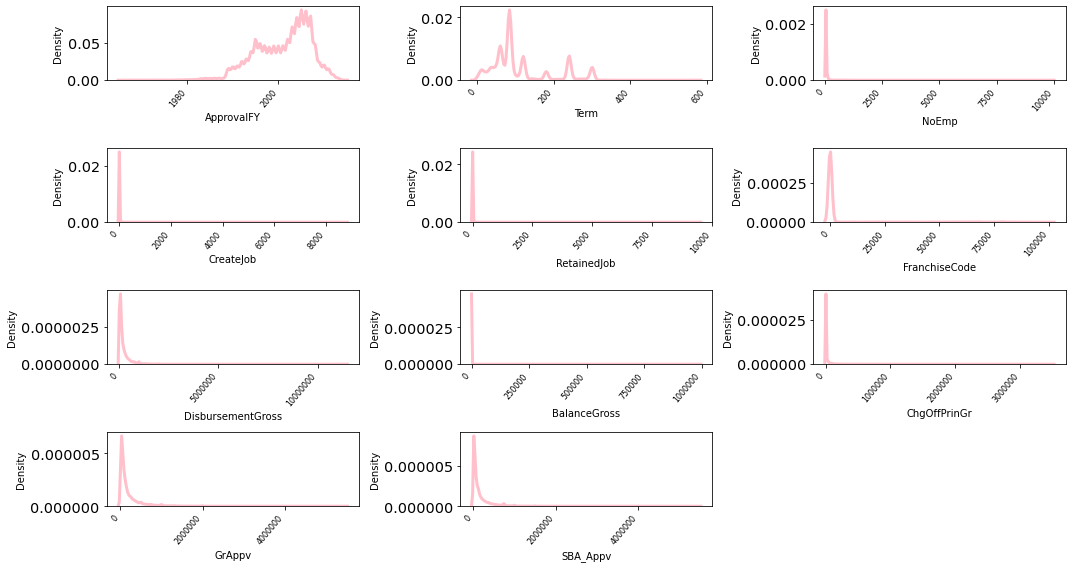

In [67]:
features = nums
plt.figure(figsize=(15, 8))
for i in range(0, len(nums)):
    plt.subplot(4, len(nums)/3, i+1)
    sns.kdeplot(x=df[features[i]], color='pink')
    plt.ticklabel_format(style='plain')
    plt.xlabel(features[i])
    plt.xticks(rotation=50, horizontalalignment='right', fontsize=8)
    plt.tight_layout()

Untuk distribution plot, bentuk distribusi adalah hal yang perlu untuk diperhatikan dalam hal skew nya.
*   Belum ada yang memiliki distribusi yang normal
*   Pada feature `ApprovalFY` dan `Term` lumayan skewed, feature `ApprovalFY` skewed ke kiri (negatively skewed) yang artinya mean < median, dan feature `Term` skewed ke kanan (positively skewed) yang artinnya mean > median.
*   Feature-feature lainnya seperti `NoEmp, CreateJob, FranchiseCode, DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, dan SBA_Appv` perlu dilakukan sesuatu karena dilihat distribusi nya hampir menempel pada ax y dikarenakan adanya outliers




## 1.5.2 Violin Plot

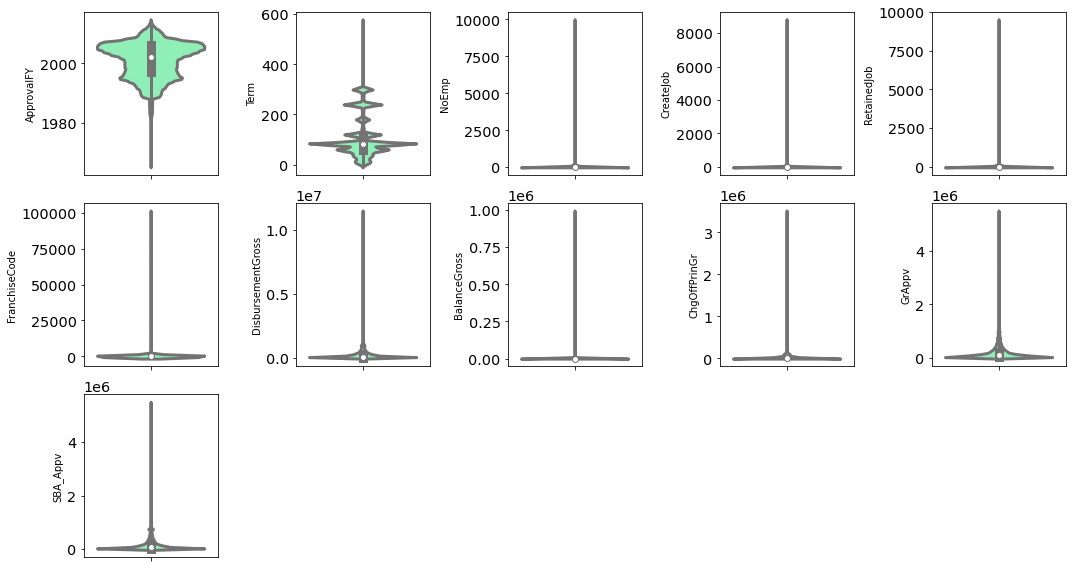

In [68]:
plt.figure(figsize=(15,8))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.violinplot(y=df[nums[i]], palette='rainbow', orient='v')
    plt.tight_layout()

Violin plot di atas adalah gabungan dari kernel density estimate (KDE) dan box plot.


*   Pada feature `ApprovalFY` bisa dilihat dari bentuk KDE nya, data banyak berkumpul dari tahun 1990-2010, pada feature  `Term` terdapat bentuk yang terpisah dikarenakan adanya outliers.

*   Feature lainnya seperti `NoEmp, CreateJob, FranchiseCode, DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, dan SBA_Appv` perlu dilakukan sesuatu karena pada plot tersebut insight yang didapatkan adalah kolom tersebut tidak membentuk violin dikarenakan adanya outliers.




## 1.5.3 Count Plot (Categorical)

In [69]:
df2_copy = df.copy()


#Menghapus kolom 'Name', 'City', 'Zip', dan 'Bank' karena memiliki kardinality yang sangat banyak
df2_copy.drop('Name', inplace=True, axis=1)
df2_copy.drop('City', inplace=True, axis=1)
df2_copy.drop('Bank', inplace=True, axis=1)
df2_copy.drop('Zip', inplace=True, axis=1)

df2_copy


,LoanNr_ChkDgt,State,BankState,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry
0,1000014003,IN,OH,28-Feb-97,1997,84,4,2.0,0,0,1,NaN,N,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,Retail_trade
1,1000024006,IN,IN,28-Feb-97,1997,60,2,2.0,0,0,1,NaN,N,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,Accom/Food_serv
2,1000034009,IN,IN,28-Feb-97,1997,180,7,1.0,0,0,1,NaN,N,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,Healthcare/Social_assist
3,1000044001,OK,OK,28-Feb-97,1997,60,2,1.0,0,0,1,NaN,N,Y,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0,NaN
4,1000054004,FL,FL,28-Feb-97,1997,240,14,1.0,7,7,1,NaN,N,N,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,OH,IL,27-Feb-97,1997,60,6,1.0,0,0,1,NaN,NaN,N,NaN,30-Sep-97,70000.0,0.0,P I F,0.0,70000.0,56000.0,Retail_trade
899160,9995603000,OH,IL,27-Feb-97,1997,60,6,1.0,0,0,1,NaN,Y,N,NaN,31-Oct-97,85000.0,0.0,P I F,0.0,85000.0,42500.0,Retail_trade
899161,9995613003,CA,CA,27-Feb-97,1997,108,26,1.0,0,0,1,NaN,N,N,NaN,30-Sep-97,300000.0,0.0,P I F,0.0,300000.0,225000.0,Manufacturing
899162,9995973006,HI,HI,27-Feb-97,1997,60,6,1.0,0,0,1,NaN,N,Y,8-Mar-00,31-Mar-97,75000.0,0.0,CHGOFF,46383.0,75000.0,60000.0,NaN


In [70]:
cats2=['State','BankState','RevLineCr','LowDoc','Industry','MIS_Status','UrbanRural','NewExist']

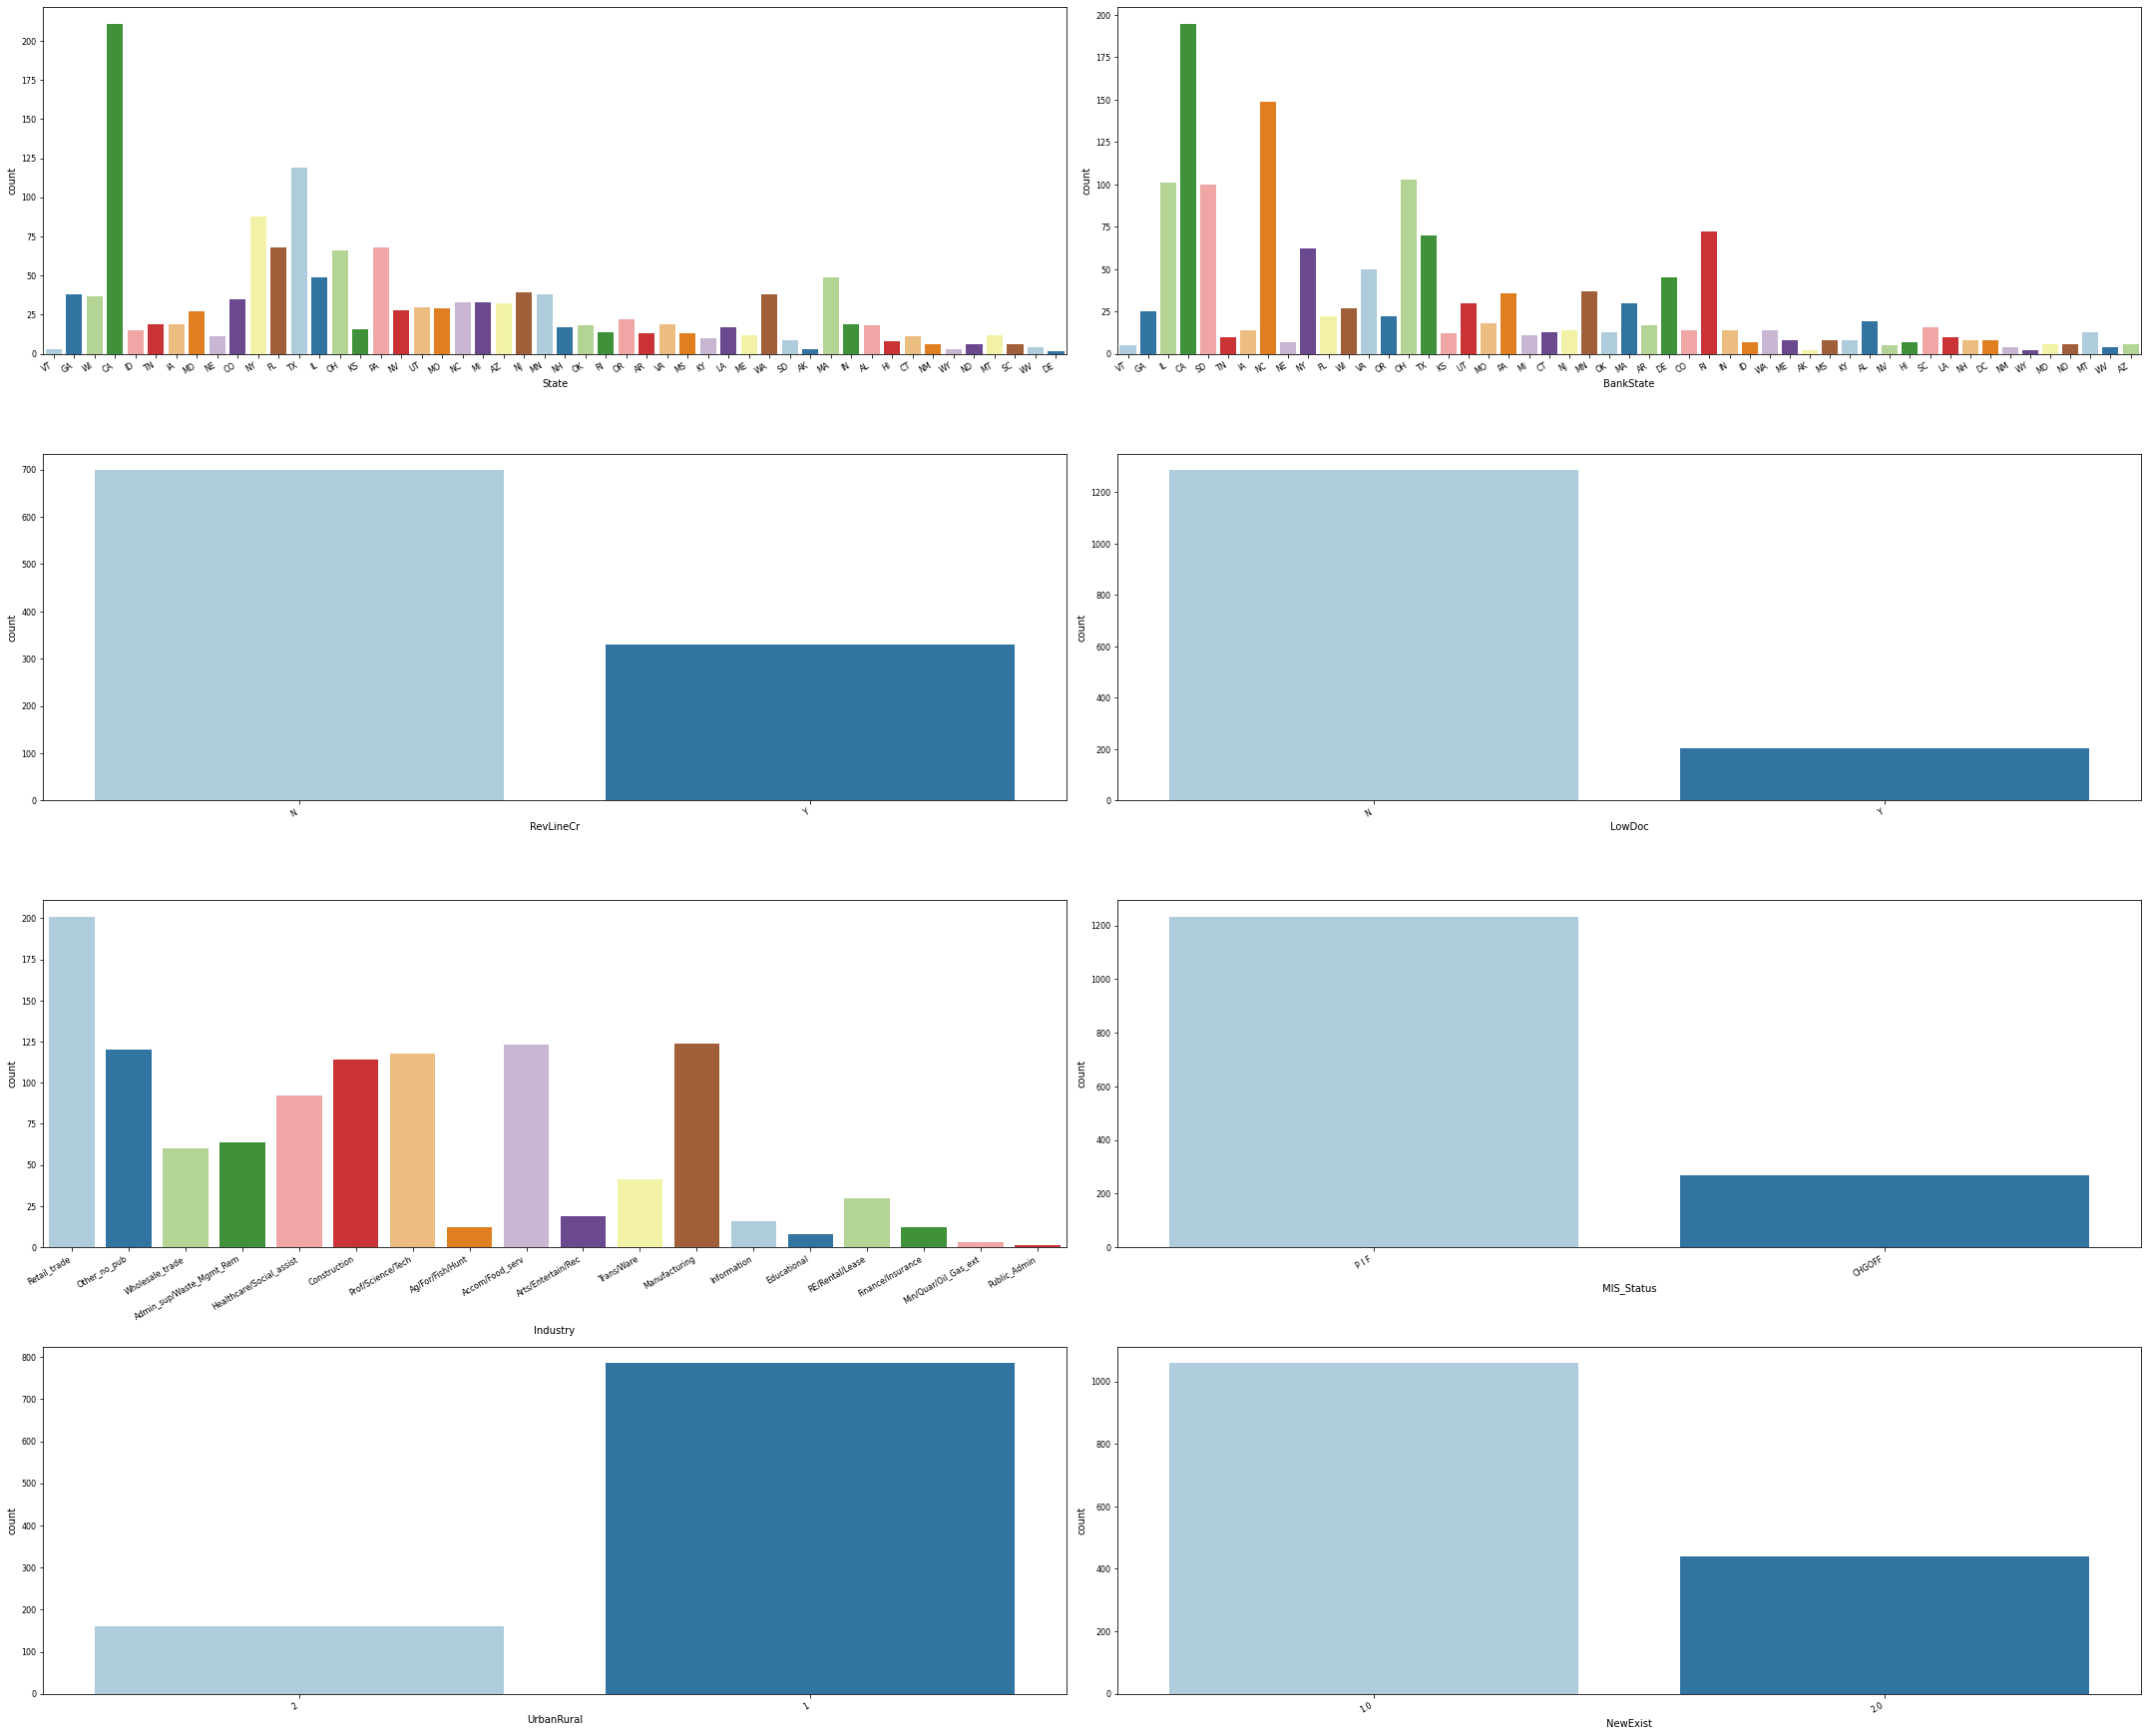

In [71]:
df_sample = df2_copy.sample(1500, random_state=42)
plt.figure(figsize=(30, 30))

for i in range(0, len(cats2)):
    plt.subplot(5,2, i+1)
    sns.countplot(x = df_sample[cats2[i]], palette="Paired", orient='v')
    plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()


 Pada feature `LowDoc` dan `MIS_Status` 
*   Pada feature `LowDoc`, `MIS_Status`, `UrbanRural`, `NewExist`, dan `RevLineCr` `Franchise code` memiliki 2 unique value.


*   Jumlah peminjam paling banyak berasal dari `Industry` Retail_trade

*   Jumlah peminjam paling banyak berasal dari `State` CA


#1.6 Multivariate Analysis

## 1.6.1 Heat Map

In [72]:
df[nums].corr()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
ApprovalFY,1.000000,-0.292661,-0.054701,-0.067115,-0.060517,-0.015580,-0.052888,0.001540,0.053640,-0.086298,-0.105268
Term,-0.292661,1.000000,0.046483,0.027584,0.024948,0.028880,0.466239,0.001700,-0.047590,0.502413,0.524744
NoEmp,-0.054701,0.046483,1.000000,0.008645,0.015389,0.006421,0.089163,-0.000123,0.007846,0.090947,0.093093
CreateJob,-0.067115,0.027584,0.008645,1.000000,0.993955,0.001032,0.006918,-0.000057,0.009371,0.008152,0.013722
RetainedJob,-0.060517,0.024948,0.015389,0.993955,1.000000,-0.000520,0.010251,-0.000080,0.010629,0.010677,0.014878
FranchiseCode,-0.015580,0.028880,0.006421,0.001032,-0.000520,1.000000,0.059424,-0.000202,0.025359,0.067758,0.069318
DisbursementGross,-0.052888,0.466239,0.089163,0.006918,0.010251,0.059424,1.000000,0.005595,0.192143,0.971349,0.940199
BalanceGross,0.001540,0.001700,-0.000123,-0.000057,-0.000080,-0.000202,0.005595,1.000000,-0.000430,0.005739,0.005266
ChgOffPrinGr,0.053640,-0.047590,0.007846,0.009371,0.010629,0.025359,0.192143,-0.000430,1.000000,0.194286,0.165283
GrAppv,-0.086298,0.502413,0.090947,0.008152,0.010677,0.067758,0.971349,0.005739,0.194286,1.000000,0.974342


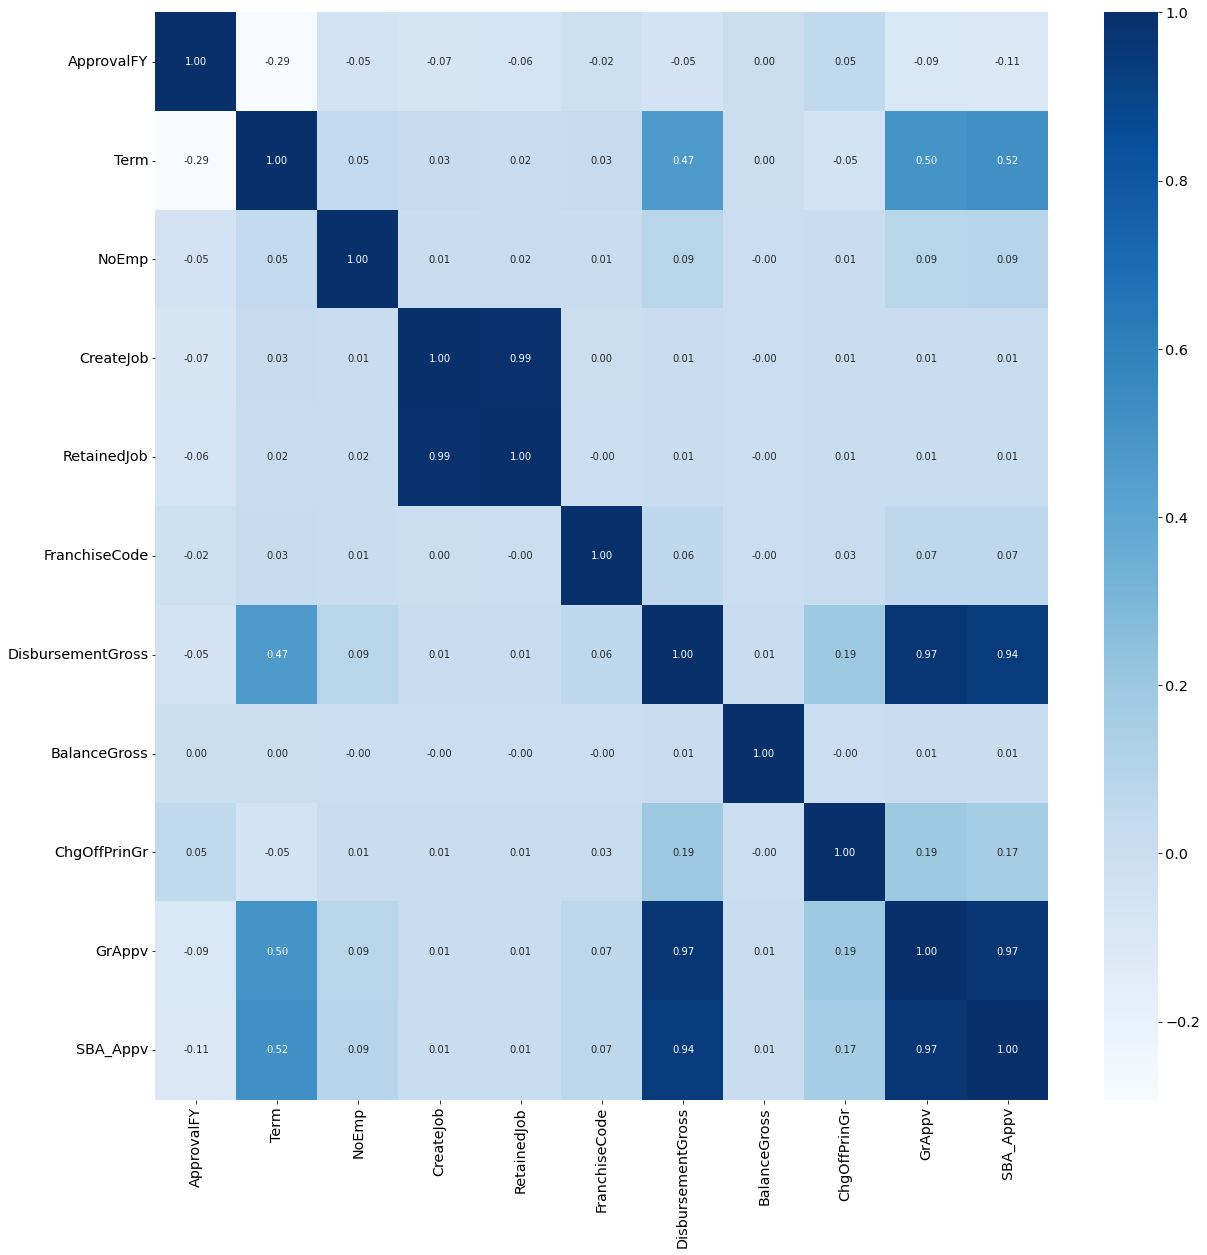

In [73]:
plt.figure(figsize=(20, 20))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

Dari correlation heatmap di atas dapat dilihat bahwa:



*   Feature `Disbursement Gross` memiliki **korelasi positif sangat kuat** dengan feature `SBA_Appv` (0.94). Ada kemungkinan kedua feature ini redundan, sehingga dapat dipilih salah satu saja (dan dibuang yang lainnya)
*  Feature `Disbursement Gross` memiliki **korelasi positif sangat kuat** dengan feature `GrAppv` (0.97). Ada kemungkinan kedua feature ini redundan, sehingga dapat dipilih salah satu saja (dan dibuang yang lainnya)
*   Feature `Term` **berkorelasi positif yang tidak cukup kuat** dengan feature target `SBA_Appv`(0.52) dan `GrAppr` (0.50)
*   Feature `CreatJob` memiliki **korelasi positif sangat kuat** dengan feature `RetainedJob` (0.99). Ada kemungkinan kedua feature ini redundan, sehingga dapat dipilih salah satu saja (dan dibuang yang lainnya)


## 1.6.2 Pair Plot 

<Figure size 1440x1440 with 0 Axes>

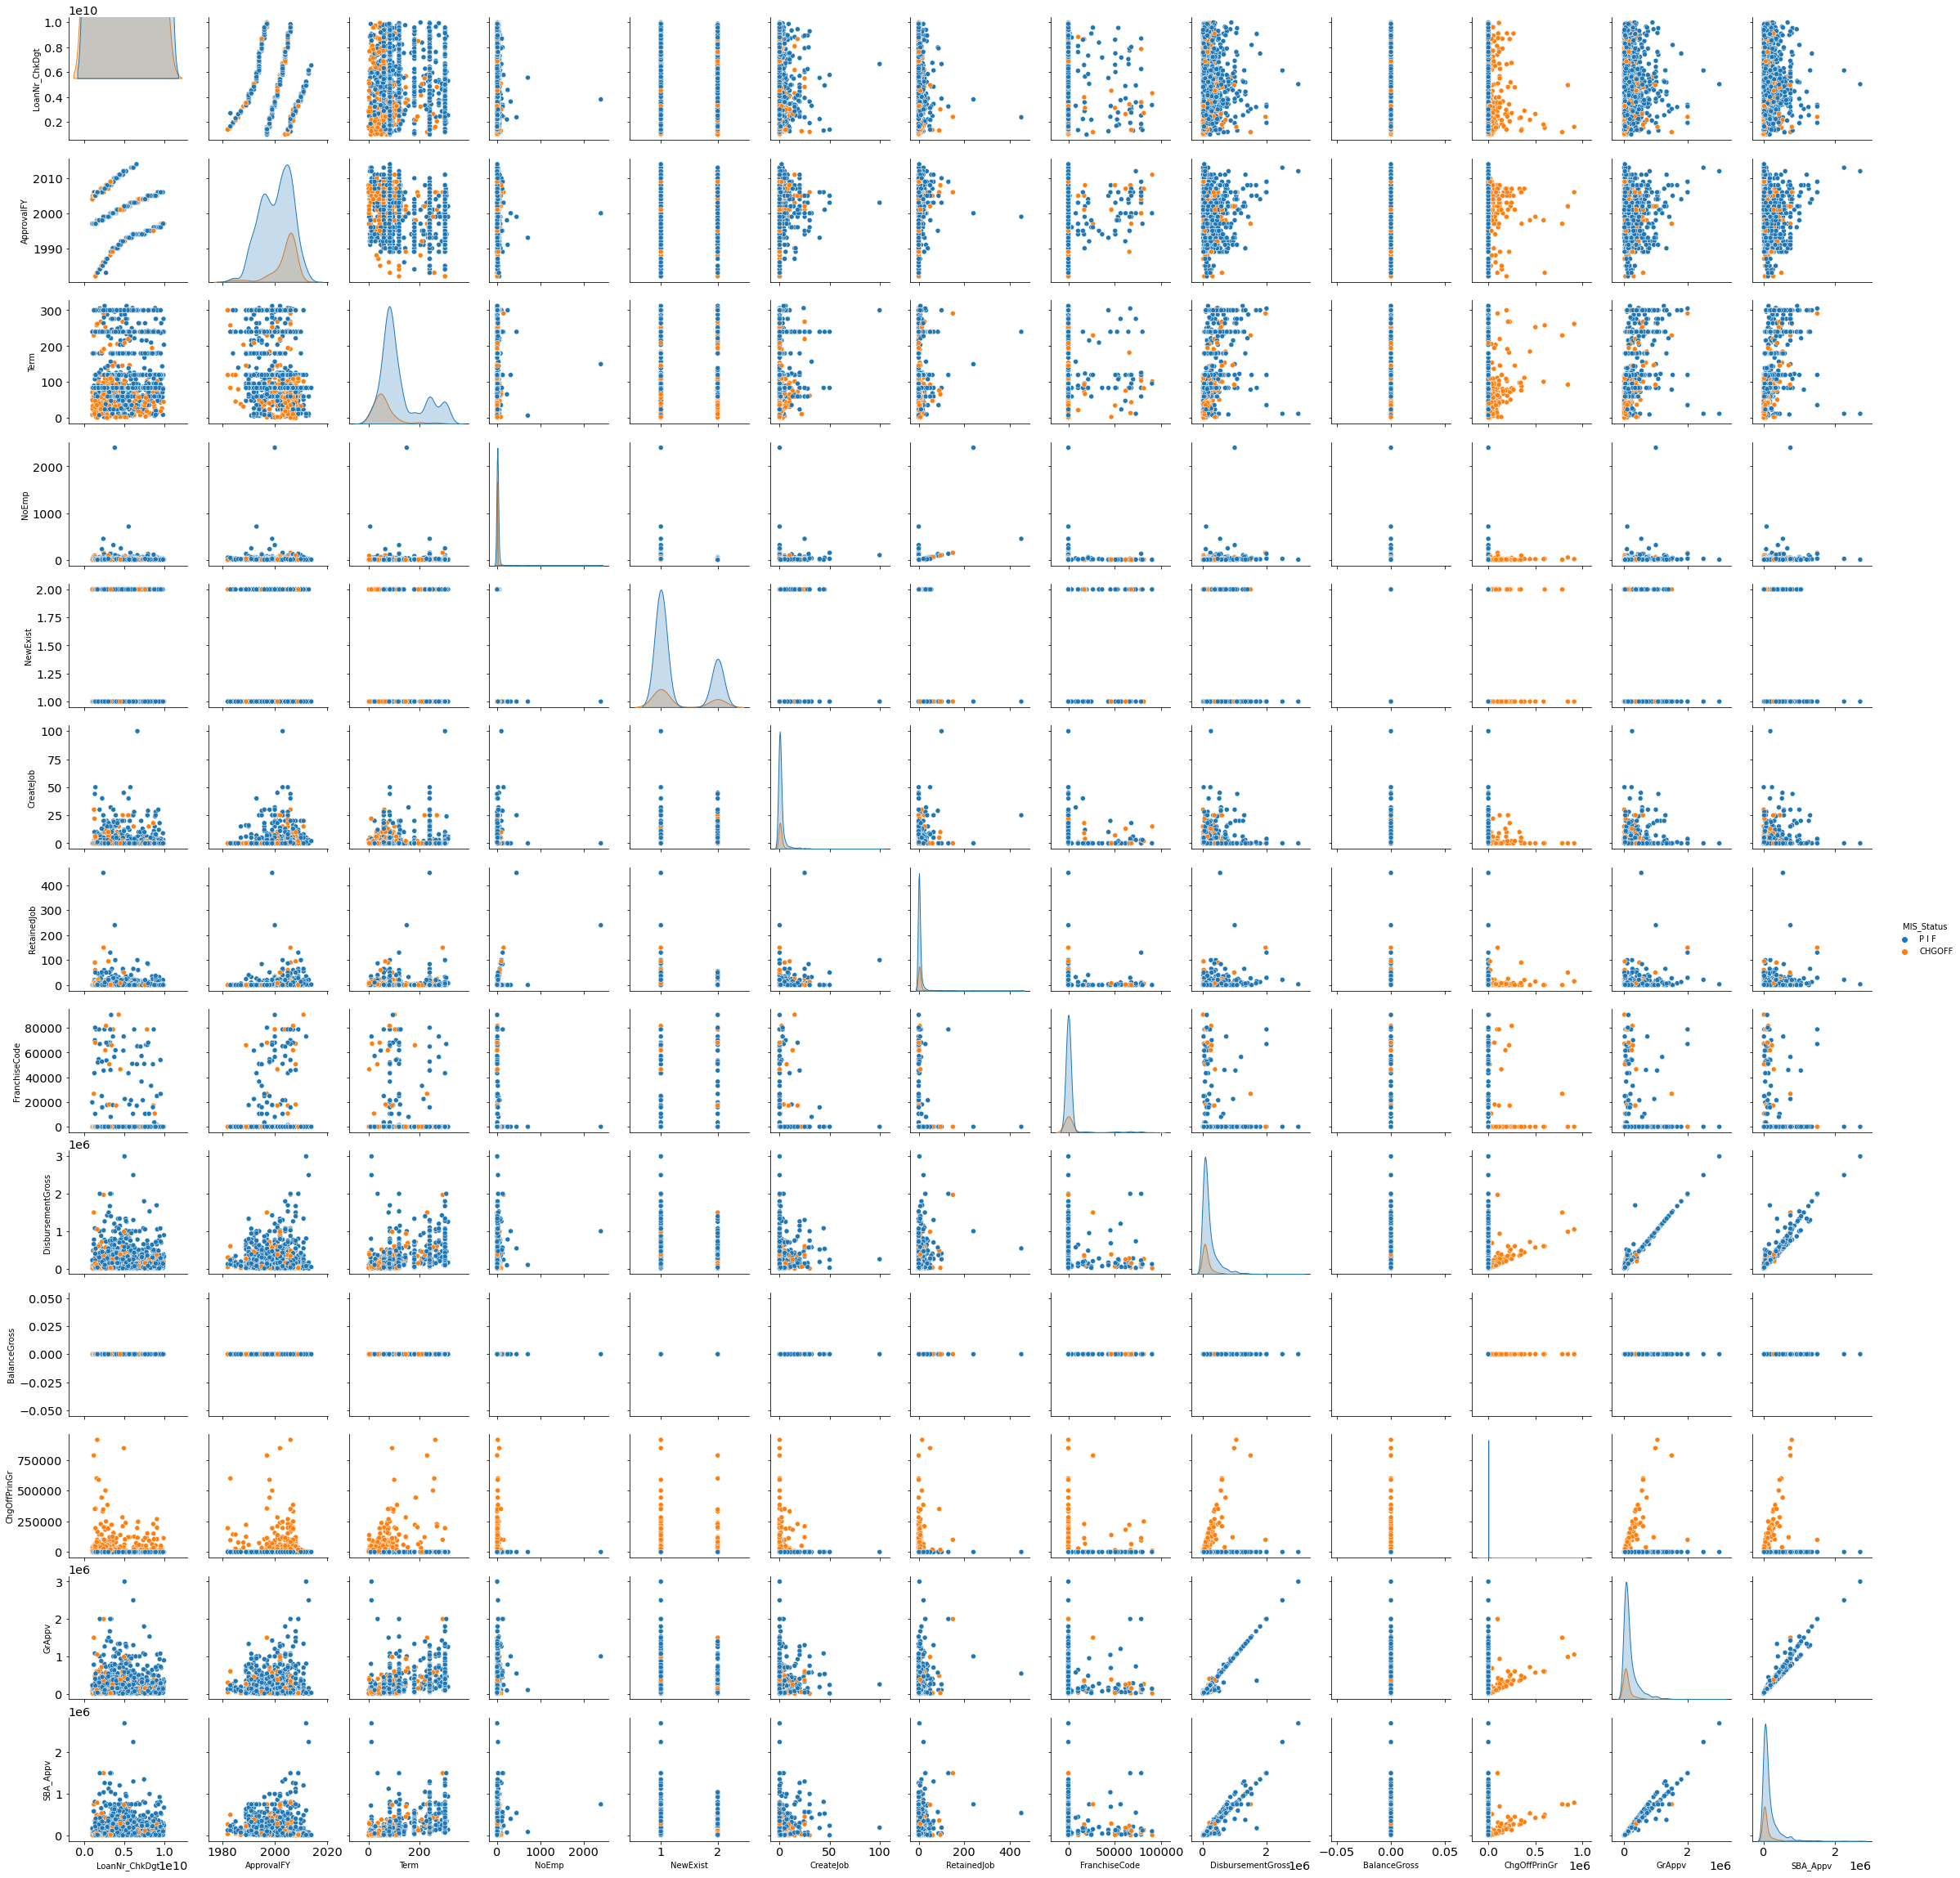

In [74]:
#df_sample2 = df2_copy.sample(1500, random_state=42)
df_sample2 = df[nums].sample(1500, random_state=42)

plt.figure(figsize=(20, 20))
sns.pairplot(df_sample, diag_kind='kde', hue = 'MIS_Status')

Dari pair plot di atas, kita dapat melihat bahwa korelasi antar-feature (dengan hue: target `MIS_Status`)di bawah ini sebagai berikut:

* Feature `ApprovalFY` dan `ChgOffPrinGr` memiliki korelasi namun tidak begitu kuat karena tidak terpisah secara menyeluruh dan bentuk sebarannya tidak beraturan.
*  Feature `Term` dan `ChgOffPrinGr` memiliki korelasi namun tidak begitu kuat karena tidak terpisah secara menyeluruh dan bentuk sebarannya tidak beraturan.
*   Feature `NoEmp` dan `ChgOffPrinGr` penyebarannya terpisah, namun tidak terlihat dengan jelas karena data yang ada di pair plot sedikit.
*  Feature `CreateJob` dan `ChgOffPrinGr`  penyebarannya terpisah, namun tidak terlihat dengan jelas karena data yang ada di pair plot sedikit.
*  Feature `RetainedJob` dan `ChgOffPrinGr`  penyebarannya terpisah, namun tidak terlihat dengan jelas karena data yang ada di pair plot sedikit.
*  Feature `FranchiseCode` dan `ChgOffPrinGr`  penyebarannya terpisah, namun tidak terlihat dengan jelas karena data yang ada di pair plot sedikit.
*  Feature `DisbursementGross` dan `ChgOffPrinGr` penyebarannya cukup jelas terpisah, sehingga memiliki korelasi yang terbilang kuat.

*  Feature `ChgOffPrinGr` dan `GrAppv`  penyebarannya cukup jelas terpisah, sehingga memiliki korelasi yang terbilang kuat.
*   Feature `ChgOffPrinGr` dan `SBA_Appv`  penyebarannya cukup jelas terpisah, sehingga memiliki korelasi yang terbilang kuat.








##1.6.3 Category Columns VS Target Variable 

In [75]:
df['MIS_Status'].value_counts()

P I F     739609
CHGOFF    157558
Name: MIS_Status, dtype: int64

In [76]:
cats=['Name', 'City', 'State','Bank','BankState','UrbanRural','RevLineCr','LowDoc','Zip','Industry','MIS_Status','NewExist']
#Untuk membandingkan hubungan feature kategorikal digunakan uji Chi Square

In [77]:
#Feature dengan unique value terlalu banyak, tidak dilakukan Chisquare test
kol_unused = ['Name','City','State','Bank','BankState','Zip','Industry']

In [78]:
#variable independent dengan unique value yang sedikit dan diperkirakan akan berguna dalam membangun model
var_cat = ['NewExist','UrbanRural','RevLineCr','LowDoc','NewExist','Industry']
target_var = ['MIS_Status']

Terakhir kita selidiki hubungan fitur-fitur kategorikal dengan calon target pemodelan kita (`MIS_Status`)

Hipotesis 1

H0 = Feature `NewExist` dan `MIS_Status` saling independen

H1 = Feature `NewExist` dan `MIS_Status` saling dependen (berkorelasi)

In [79]:
def chi2_by_hand(df, col1, col2):    
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    display(df_cont)
    #---calculate degree of freedom---
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    #---sum up the totals for row and columns---
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
    print('---Observed (O)---')
    display(df_cont)
    #---create the expected value dataframe---
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values) /df_cont.sum().sum()             
    print('---Expected (E)---')
    display(df_exp)
        
    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    print('---Chi-Square---')
    display(df_chi2)
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()

    #---calculate the p-value---
    from scipy import stats
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)

    return chi_square_score, degree_f, p

In [80]:
chi_score, degree_f, p = chi2_by_hand(df,'NewExist','MIS_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

MIS_Status,CHGOFF,P I F
NewExist,,
1.0,110114,533332
2.0,47367,205192


---Observed (O)---


MIS_Status,CHGOFF,P I F,Total
NewExist,,,
1.0,110114,533332,643446
2.0,47367,205192,252559
Total,157481,738524,896005


---Expected (E)---


MIS_Status,CHGOFF,P I F,Total
NewExist,,,
1.0,113091.466594,530354.533406,643446.0
2.0,44389.533406,208169.466594,252559.0
Total,157481.000000,738524.000000,896005.0


---Chi-Square---


MIS_Status,CHGOFF,P I F,Total
NewExist,,,
1.0,78.390595,16.715813,95.106408
2.0,199.716164,42.586972,242.303136
Total,278.106758,59.302786,337.409544


Chi2_score: 337.409544008566, Degrees of freedom: 1, p-value: 2.3390100333911784e-75


In [81]:
print('p-value :',p)
if p >= 0.05:
    print('Tidak cukup bukti menyatakan bahwa NewExist berkorelasi dengan MIS_Status ')
else:
    print('Cukup bukti menolak H0, sehingga kesimpulannya adalah NewExist memiliki korelasi dengan MIS_Status')

p-value : 2.3390100333911784e-75
Cukup bukti menolak H0, sehingga kesimpulannya adalah NewExist memiliki korelasi dengan MIS_Status


Kesimpulan: Feature `NewExist` memiliki korelasi dengan `MIS_Status`

Hipotesis 2

H0 = Feature `UrbanRural` dan `MIS_Status` saling independen

H1 = Feature `UrbanRural `dan `MIS_Status `saling dependen (berkorelasi)

In [82]:
chi_score, degree_f, p = chi2_by_hand(df,'UrbanRural','MIS_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

MIS_Status,CHGOFF,P I F
UrbanRural,,
1,114867,354414
2,19713,85347


---Observed (O)---


MIS_Status,CHGOFF,P I F,Total
UrbanRural,,,
1,114867,354414,469281
2,19713,85347,105060
Total,134580,439761,574341


---Expected (E)---


MIS_Status,CHGOFF,P I F,Total
UrbanRural,,,
1,109962.264543,359318.735457,469281.0
2,24617.735457,80442.264543,105060.0
Total,134580.000000,439761.000000,574341.0


---Chi-Square---


MIS_Status,CHGOFF,P I F,Total
UrbanRural,,,
1,218.769866,66.950113,285.719979
2,977.199139,299.052122,1276.251261
Total,1195.969006,366.002235,1561.971240


Chi2_score: 1561.9712403347448, Degrees of freedom: 1, p-value: 0.0


In [83]:
print('p-value :',p)
if p >= 0.05:
    print('Tidak cukup bukti menyatakan bahwa UrbanRural berkorelasi dengan MIS_Status ')
else:
    print('Cukup bukti menolak H0, sehingga kesimpulannya adalah UrbanRural memiliki korelasi dengan MIS_Status')

p-value : 0.0
Cukup bukti menolak H0, sehingga kesimpulannya adalah UrbanRural memiliki korelasi dengan MIS_Status


Kesimpulan: Feature 'UrbanRural' memiliki korelasi dengan 'MIS_Status'

Hipotesis 3

H0 = Feature '`RevLineCr`' dan '`MIS_Status`' saling independen

H1 = Feature '`RevLineCr`' dan '`MIS_Status`' saling dependen (berkorelasi)

In [84]:
chi_score, degree_f, p = chi2_by_hand(df,'RevLineCr','MIS_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

MIS_Status,CHGOFF,P I F
RevLineCr,,
N,61401,357851
Y,50990,149670


---Observed (O)---


MIS_Status,CHGOFF,P I F,Total
RevLineCr,,,
N,61401,357851,419252
Y,50990,149670,200660
Total,112391,507521,619912


---Expected (E)---


MIS_Status,CHGOFF,P I F,Total
RevLineCr,,,
N,76011.033069,343240.966931,419252.0
Y,36379.966931,164280.033069,200660.0
Total,112391.000000,507521.000000,619912.0


---Chi-Square---


MIS_Status,CHGOFF,P I F,Total
RevLineCr,,,
N,2808.185308,621.875262,3430.060570
Y,5867.324363,1299.324466,7166.648829
Total,8675.509670,1921.199728,10596.709399


Chi2_score: 10596.709398613337, Degrees of freedom: 1, p-value: 0.0


In [85]:
print('p-value :',p)
if p >= 0.05:
    print('Tidak cukup bukti menyatakan bahwa RevLineCr berkorelasi dengan MIS_Status ')
else:
    print('Cukup bukti menolak H0, sehingga kesimpulannya adalah RevLineCr memiliki korelasi dengan MIS_Status')

p-value : 0.0
Cukup bukti menolak H0, sehingga kesimpulannya adalah RevLineCr memiliki korelasi dengan MIS_Status


Kesimpulan: Feature '`RevLineCr`' memiliki korelasi dengan '`MIS_Status`'

Hipotesis 4

H0 = Feature '`LowDoc`' dan '`MIS_Status`' saling independen

H1 = Feature '`LowDoc`' dan '`MIS_Status`' saling dependen (berkorelasi)

In [86]:
chi_score, degree_f, p = chi2_by_hand(df,'LowDoc','MIS_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

MIS_Status,CHGOFF,P I F
LowDoc,,
N,146077,634920
Y,9904,100267


---Observed (O)---


MIS_Status,CHGOFF,P I F,Total
LowDoc,,,
N,146077,634920,780997
Y,9904,100267,110171
Total,155981,735187,891168


---Expected (E)---


MIS_Status,CHGOFF,P I F,Total
LowDoc,,,
N,136697.786564,644299.213436,780997.0
Y,19283.213436,90887.786564,110171.0
Total,155981.000000,735187.000000,891168.0


---Chi-Square---


MIS_Status,CHGOFF,P I F,Total
LowDoc,,,
N,643.533790,136.535390,780.069180
Y,4561.980552,967.892915,5529.873467
Total,5205.514342,1104.428305,6309.942647


Chi2_score: 6309.942647263114, Degrees of freedom: 1, p-value: 0.0


In [87]:
print('p-value :',p)
if p >= 0.05:
    print('Tidak cukup bukti menyatakan bahwa LowDoc berkorelasi dengan MIS_Status ')
else:
   print('Cukup bukti menolak H0, sehingga kesimpulannya adalah LowDoc memiliki korelasi dengan MIS_Status')

p-value : 0.0
Cukup bukti menolak H0, sehingga kesimpulannya adalah LowDoc memiliki korelasi dengan MIS_Status


Kesimpulan: Feature `LowDoc` memiliki korelasi dengan `MIS_Status`



Hipotesis 5

H0 = Feature `Industry` dan `MIS_Status` saling independen

H1 = Feature `Industry` dan `MIS_Status` saling dependen (berkorelasi)

In [88]:
chi_score, degree_f, p = chi2_by_hand(df,'Industry','MIS_Status')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

MIS_Status,CHGOFF,P I F
Industry,,
Accom/Food_serv,14882,52629
Admin_sup/Waste_Mgmt_Rem,7661,24868
Ag/For/Fish/Hunt,812,8183
Arts/Entertain/Rec,3013,11603
Construction,15463,51029
Educational,1552,4849
Finance/Insurance,2692,6778
Healthcare/Social_assist,5736,49528
Information,2821,8541


---Observed (O)---


MIS_Status,CHGOFF,P I F,Total
Industry,,,
Accom/Food_serv,14882,52629,67511
Admin_sup/Waste_Mgmt_Rem,7661,24868,32529
Ag/For/Fish/Hunt,812,8183,8995
Arts/Entertain/Rec,3013,11603,14616
Construction,15463,51029,66492
Educational,1552,4849,6401
Finance/Insurance,2692,6778,9470
Healthcare/Social_assist,5736,49528,55264
Information,2821,8541,11362


---Expected (E)---


MIS_Status,CHGOFF,P I F,Total
Industry,,,
Accom/Food_serv,13663.236303,53847.763697,67511.0
Admin_sup/Waste_Mgmt_Rem,6583.392539,25945.607461,32529.0
Ag/For/Fish/Hunt,1820.456082,7174.543918,8995.0
Arts/Entertain/Rec,2958.064046,11657.935954,14616.0
Construction,13457.005648,53034.994352,66492.0
Educational,1295.468525,5105.531475,6401.0
Finance/Insurance,1916.589116,7553.410884,9470.0
Healthcare/Social_assist,11184.623114,44079.376886,55264.0
Information,2299.502168,9062.497832,11362.0


---Chi-Square---


MIS_Status,CHGOFF,P I F,Total
Industry,,,
Accom/Food_serv,108.713991,27.584896,136.298887
Admin_sup/Waste_Mgmt_Rem,176.388972,44.756626,221.145597
Ag/For/Fish/Hunt,558.642243,141.748895,700.391138
Arts/Entertain/Rec,1.020248,0.258876,1.279124
Construction,299.027395,75.874682,374.902077
Educational,50.798917,12.889627,63.688544
Finance/Insurance,313.714627,79.601394,393.316021
Healthcare/Social_assist,2654.313296,673.500760,3327.814056
Information,118.269072,30.009385,148.278458


Chi2_score: 8288.14838610204, Degrees of freedom: 19, p-value: 0.0


In [89]:
print('p-value :',p)
if p >= 0.05:
    print('Tidak cukup bukti menyatakan bahwa Industry berkorelasi dengan MIS_Status ')
else:
    print('Cukup bukti menolak H0, sehingga kesimpulannya adalah Industry memiliki korelasi dengan MIS_Status')

p-value : 0.0
Cukup bukti menolak H0, sehingga kesimpulannya adalah Industry memiliki korelasi dengan MIS_Status


Kesimpulan: Feature 'Industry' memiliki korelasi dengan 'MIS_Status'


Kesimpulan Uji Chi Square:


*    Berdasarkan uji chi square, feature `RevLineCr` dan target `MIS_Status` saling dependen (berkorelasi)
*    Berdasarkan uji chi square, feature `LowDoc` dan target `MIS_Status` saling dependen (berkorelasi)
*    Berdasarkan uji chi square, feature `UrbanRural` dan target `MIS_Status` saling dependen (berkorelasi)
*   Berdasarkan uji chi square, feature `NewExist` dan target `MIS_Status` saling dependen (berkorelasi)
*   Berdasarkan uji chi square, feature `Industry` dan target `MIS_Status` saling dependen (berkorelasi)




Sementara itu, feature RevLineCr, LowDoc, & New Exist memiliki atribut lebih dari dua jenis dimana value lainnya dalah NaN. Oleh karena itu, mari kita cek dengan visualisasi

In [90]:
df_agg1=df.groupby(['NewExist','MIS_Status']).agg({'LoanNr_ChkDgt' : 'nunique'}).sort_values('LoanNr_ChkDgt',ascending=False).reset_index()
df_agg2=df.groupby(['NewExist']).agg({'LoanNr_ChkDgt' : 'nunique'}).sort_values('LoanNr_ChkDgt',ascending=False).reset_index()
df_agg = df_agg1.merge(df_agg2, on = 'NewExist', how = 'inner')
df_agg = df_agg.rename(columns = {'LoanNr_ChkDgt_x':'Total_Cats', 'LoanNr_ChkDgt_y': 'Total'})
df_agg[['NewExist', 'MIS_Status', 'Total_Cats', 'Total']]
df_agg['Percentage'] = round(df_agg['Total_Cats']/df_agg['Total']*100, 2)
df_filter = df_agg[['NewExist', 'MIS_Status', 'Total_Cats', 'Total', 'Percentage']]
df_filter

,NewExist,MIS_Status,Total_Cats,Total,Percentage
0,1.0,P I F,533332,643446,82.89
1,1.0,CHGOFF,110114,643446,17.11
2,2.0,P I F,205192,252559,81.25
3,2.0,CHGOFF,47367,252559,18.75


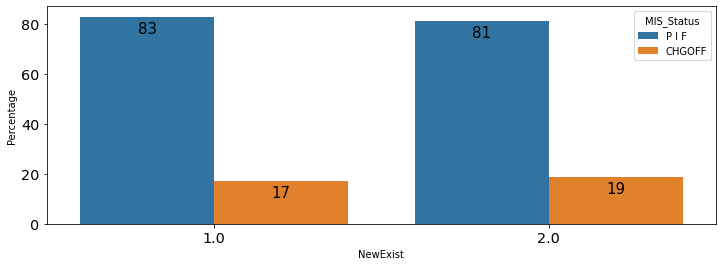

In [91]:
ax = sns.barplot(x='NewExist', y='Percentage', data=df_filter, hue='MIS_Status', ci=None)

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

Terlihat persentase gagal bayar (CHGOFF) lebih besar di New Business (kode 2.0) dibanding persentase gagal bayar di Existing Business (kode 1.0)

In [92]:
df_agg3=df.groupby(['UrbanRural','MIS_Status']).agg({'LoanNr_ChkDgt' : 'nunique'}).sort_values('LoanNr_ChkDgt',ascending=False).reset_index()
df_agg4=df.groupby(['UrbanRural']).agg({'LoanNr_ChkDgt' : 'nunique'}).sort_values('LoanNr_ChkDgt',ascending=False).reset_index()
df_agg_ = df_agg3.merge(df_agg4, on = 'UrbanRural', how = 'inner')
df_agg_= df_agg_.rename(columns = {'LoanNr_ChkDgt_x':'Total_Cats', 'LoanNr_ChkDgt_y': 'Total'})
df_agg_['Percentage'] = round(df_agg_['Total_Cats']/df_agg_['Total']*100, 2)
df_filter_ = df_agg_[['UrbanRural', 'MIS_Status', 'Total_Cats', 'Total', 'Percentage']] 
df_filter_ 

,UrbanRural,MIS_Status,Total_Cats,Total,Percentage
0,1,P I F,354414,469281,75.52
1,1,CHGOFF,114867,469281,24.48
2,2,P I F,85347,105060,81.24
3,2,CHGOFF,19713,105060,18.76


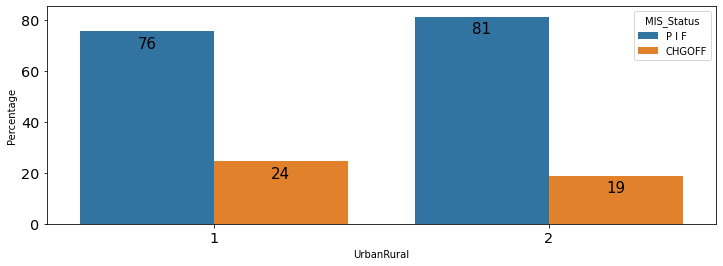

In [93]:
ax1 = sns.barplot(x='UrbanRural', y='Percentage', data=df_filter_, hue='MIS_Status', ci=None) 

for p in ax1.patches:
  ax1.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

Terlihat persentase gagal bayar (CHGOFF) lebih besar di Urban (1) dibanding persentase gagal bayar di Rural (0)

#1.7 EDA Conclusion


Setelah melakukan proses EDA pada dataset ini, kami menemukan beberapa hal yang perlu diperhatikan, diantaranya:
1.	Data terdiri dari 899164 baris, tetapi setelah menghapus missing value yang ada pada target MIS_Status, total data menjadi 897167
2.	Diperlukan perubahan tipe data karena terdapat beberapa feature dengan tipe data yang tidak sesuai. Hal ini ditujukkan agar kita dapat lebih mudah dan lebih kaya data dalam business insight
3.	Terdapat banyak value yang anomali dan tidak sesuai dengan featurenya, perlu diberikan treatment seperti di drop atau lainnya pada stage 2
4.	Tidak ada duplikasi data namun diperlukan handling missing value karena terdapat beberapa feature yang memiliki nilai kosong
5.	Feature `MIS_Status` menjadi target sehingga perlu dilakukan dropping pada missing value di feature ini
6.	Tidak ada feature yang memiliki distribusi normal (mayoritas positively skewed) dan perlu dilakukan log transformation
7.	Terdapat beberapa feature yang memiliki jumlah unique value yang cukup tinggi dan memerlukan treatment nantinya
8.	Data didominasi (proporsi lebih dari 50% dari jumlah baris data) oleh No (LowDoc) dan PIF/Pay In Full (`MIS_Status`)
9.	Terdapat outlier pada beberapa feature sehingga perlu diberikan treatment nantinya
10.	Dari correlation heatmap, terdapat beberapa antar-feature yang memiliki korelasi sangat tinggi sehingga pe. Poin ini perlu diperhatikan lebih lanjut.



#1.8 Business Insight

Please note that we make some changes in data type and add some features as we want to provide the understable graphs for user even we are still in stage 1

In [94]:
df['MIS_Status']=df['MIS_Status'].apply(lambda x: 'Paid In Full' if x == 'P I F' else 'Default')  
df

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,28-Feb-97,1997,84,4,2.0,0,0,1,NaN,N,Y,NaN,28-Feb-99,60000.0,0.0,Paid In Full,0.0,60000.0,48000.0,Retail_trade
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,28-Feb-97,1997,60,2,2.0,0,0,1,NaN,N,Y,NaN,31-May-97,40000.0,0.0,Paid In Full,0.0,40000.0,32000.0,Accom/Food_serv
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,28-Feb-97,1997,180,7,1.0,0,0,1,NaN,N,N,NaN,31-Dec-97,287000.0,0.0,Paid In Full,0.0,287000.0,215250.0,Healthcare/Social_assist
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,28-Feb-97,1997,60,2,1.0,0,0,1,NaN,N,Y,NaN,30-Jun-97,35000.0,0.0,Paid In Full,0.0,35000.0,28000.0,NaN
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,28-Feb-97,1997,240,14,1.0,7,7,1,NaN,N,N,NaN,14-May-97,229000.0,0.0,Paid In Full,0.0,229000.0,229000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,27-Feb-97,1997,60,6,1.0,0,0,1,NaN,NaN,N,NaN,30-Sep-97,70000.0,0.0,Paid In Full,0.0,70000.0,56000.0,Retail_trade
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,27-Feb-97,1997,60,6,1.0,0,0,1,NaN,Y,N,NaN,31-Oct-97,85000.0,0.0,Paid In Full,0.0,85000.0,42500.0,Retail_trade
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,27-Feb-97,1997,108,26,1.0,0,0,1,NaN,N,N,NaN,30-Sep-97,300000.0,0.0,Paid In Full,0.0,300000.0,225000.0,Manufacturing
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,27-Feb-97,1997,60,6,1.0,0,0,1,NaN,N,Y,8-Mar-00,31-Mar-97,75000.0,0.0,Default,46383.0,75000.0,60000.0,NaN


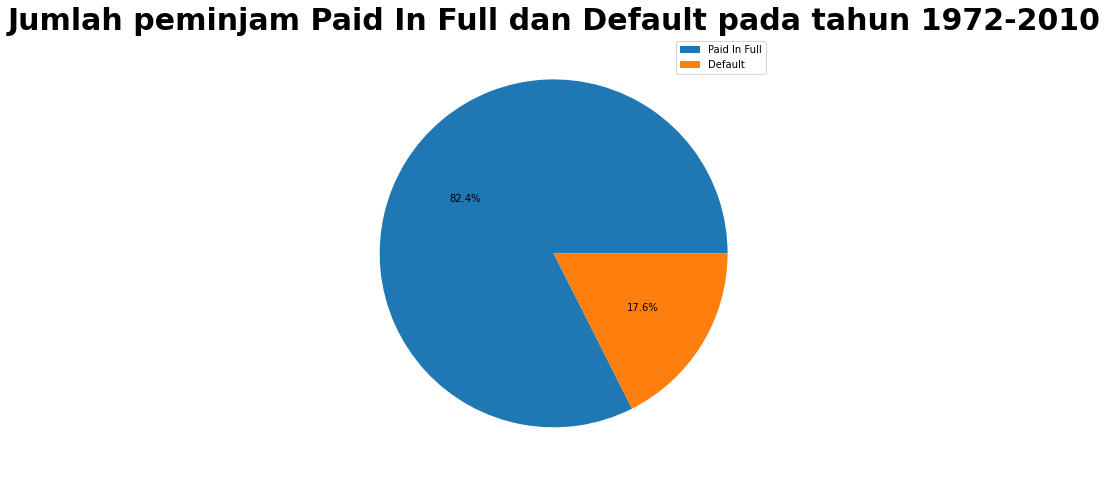

In [95]:
fig = plt.figure(figsize=(10,8))
plt.pie(pd.Series(df['MIS_Status']).value_counts(), autopct='%1.1f%%')
plt.title('Jumlah peminjam Paid In Full dan Default pada tahun 1972-2010', color='black',fontsize=30,fontweight='bold')
plt.legend(['Paid In Full','Default'])

##1.8.1 Jumlah peminjam Paid In Full/Default berdasarkan Industry

In [96]:
dfs1 = df.groupby(['Industry', 'MIS_Status'])['LoanNr_ChkDgt'].nunique().reset_index(name='UniqueCustomer')
dfs2 = df.groupby(['Industry'])['LoanNr_ChkDgt'].nunique().reset_index(name='AllUniqueCustomer')

dfs = dfs1.merge(dfs2, how = 'inner', on='Industry')
dfs['PercentUniqueCustomer(%)']=round(dfs['UniqueCustomer']*100.0/dfs['AllUniqueCustomer'], 2)
dfs

,Industry,MIS_Status,UniqueCustomer,AllUniqueCustomer,PercentUniqueCustomer(%)
0,Accom/Food_serv,Default,14882,67511,22.04
1,Accom/Food_serv,Paid In Full,52629,67511,77.96
2,Admin_sup/Waste_Mgmt_Rem,Default,7661,32529,23.55
3,Admin_sup/Waste_Mgmt_Rem,Paid In Full,24868,32529,76.45
4,Ag/For/Fish/Hunt,Default,812,8995,9.03
5,Ag/For/Fish/Hunt,Paid In Full,8183,8995,90.97
6,Arts/Entertain/Rec,Default,3013,14616,20.61
7,Arts/Entertain/Rec,Paid In Full,11603,14616,79.39
8,Construction,Default,15463,66492,23.26
9,Construction,Paid In Full,51029,66492,76.74


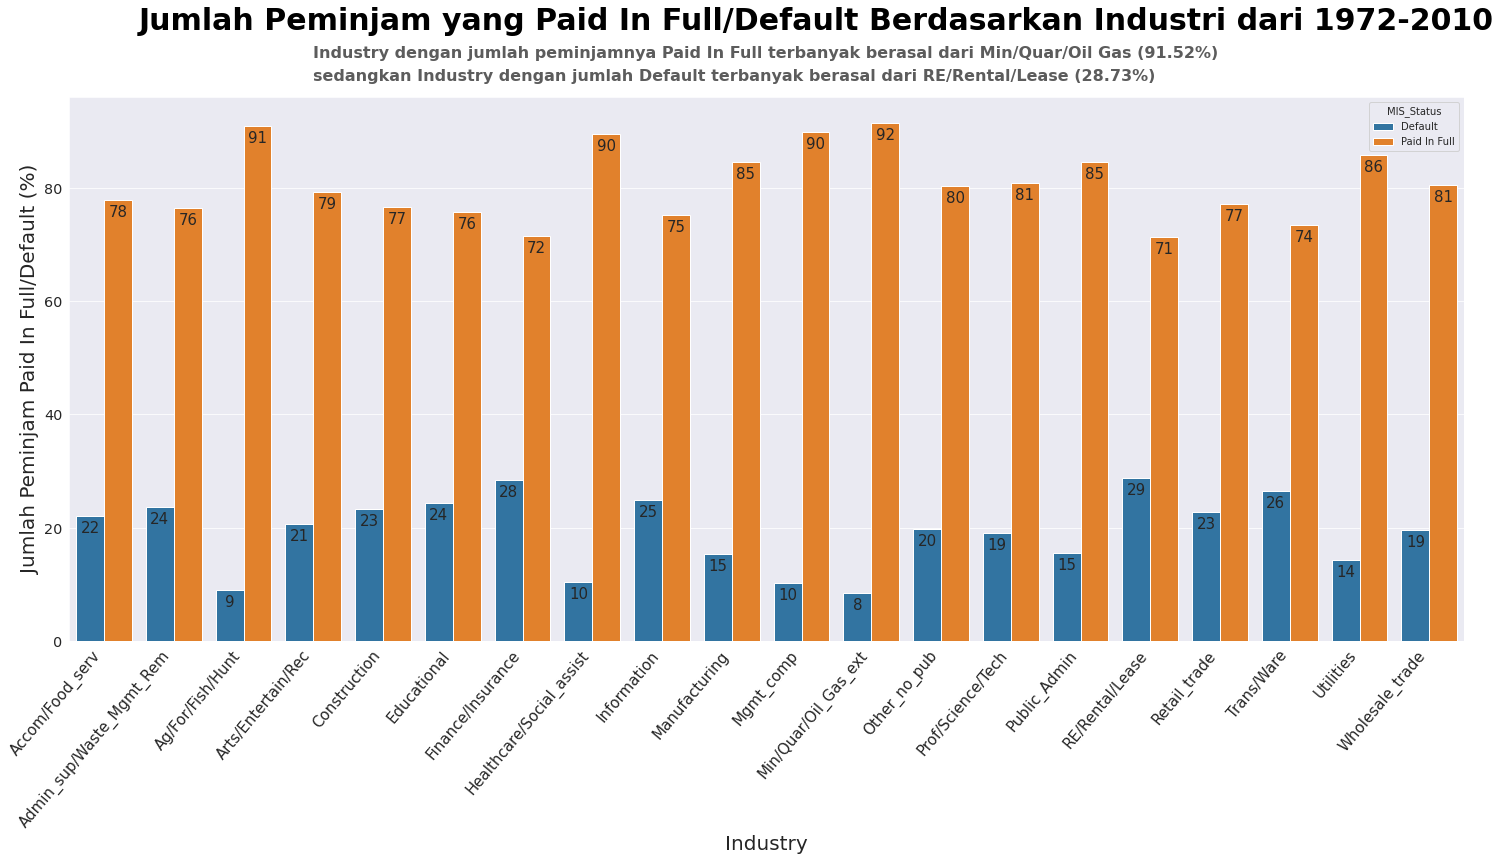

In [97]:
plt.figure(figsize=(25,10))
sns.set_style('darkgrid')
plotting = sns.barplot(x='Industry', y='PercentUniqueCustomer(%)', hue='MIS_Status', data=dfs);

plt.ylabel('Jumlah Peminjam Paid In Full/Default (%)', fontsize=20)
plt.xlabel('Industry', fontsize=20) 
plt.xticks(rotation=50, horizontalalignment='right', fontsize=15)

plotting.text(0.5, 108, 'Jumlah Peminjam yang Paid In Full/Default Berdasarkan Industri dari 1972-2010',color='black',fontsize=30,fontweight='bold')
plotting.text(3, 103, "Industry dengan jumlah peminjamnya Paid In Full terbanyak berasal dari Min/Quar/Oil Gas (91.52%)", fontsize=16, weight = 'bold', alpha = .75)
plotting.text(3, 99, "sedangkan Industry dengan jumlah Default terbanyak berasal dari RE/Rental/Lease (28.73%)",fontsize=16, weight = 'bold', alpha = .75)

for p in plotting.patches:
    plotting.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.show()

Industri bisa menjadi salah satu feature yang memengaruhi kemampuan sebuah bisnis untuk dapat membayar pinjaman.

Dalam dataset yang kami gunakan, industri mining, oil, and gas exploration memiliki presentase terendah untuk ChgOff. Hal ini dikarenakan pada waktu itu, produk ini memiliki demand yang cukup tinggi dari semua negara sehingga perputaran bisnisnya lancar dan memiliki kemungkinan besar untuk membayar pinjaman tepat waktu. 

Oleh karena itu, penting untuk menganalisis industri dari bisnis calon peminjam (bekerja sama dengan divisi research).

##1.8.2 Jumlah peminjam Paid In Full/default berdasarkan State

In [98]:
dfs3 = df.groupby(['State', 'MIS_Status'])['LoanNr_ChkDgt'].nunique().reset_index(name='UniqueCustomerState')
dfs4 = df.groupby(['State'])['LoanNr_ChkDgt'].nunique().reset_index(name='AllUniqueCustomerState')

dfs5 = dfs3.merge(dfs4, how = 'inner', on='State')
dfs5['PercentUniqueCustomerState']=round(dfs5['UniqueCustomerState']*100.0/dfs5['AllUniqueCustomerState'], 2) 

dfs5

,State,MIS_Status,UniqueCustomerState,AllUniqueCustomerState,PercentUniqueCustomerState
0,AK,Default,281,2403,11.69
1,AK,Paid In Full,2122,2403,88.31
2,AL,Default,1389,8360,16.61
3,AL,Paid In Full,6971,8360,83.39
4,AR,Default,1064,6333,16.80
...,...,...,...,...,...
97,WI,Paid In Full,18461,21021,87.82
98,WV,Default,530,3285,16.13
99,WV,Paid In Full,2755,3285,83.87
100,WY,Default,199,2838,7.01


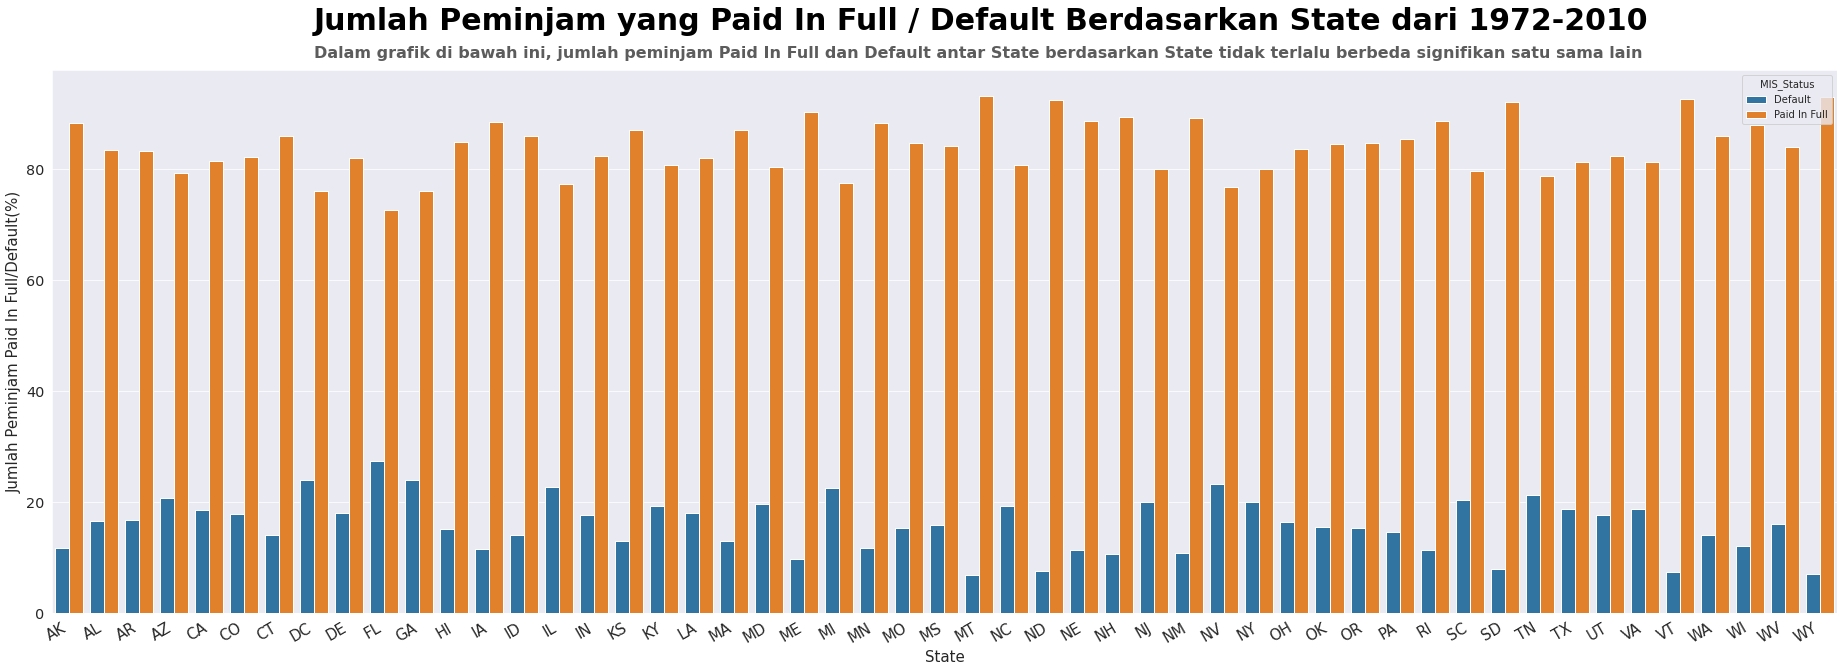

In [99]:
plt.figure(figsize=(32,10))
sns.set_style('darkgrid')
plotting = sns.barplot(x='State', y='PercentUniqueCustomerState', hue='MIS_Status', data=dfs5);

plt.ylabel('Jumlah Peminjam Paid In Full/Default(%)', fontsize=15)
plt.xlabel('State', fontsize=15) 
plt.xticks(rotation=30, horizontalalignment='right', fontsize=15)

plotting.text(7, 105, 'Jumlah Peminjam yang Paid In Full / Default Berdasarkan State dari 1972-2010',color='black',fontsize=30,fontweight='bold')
plotting.text(7, 100, "Dalam grafik di bawah ini, jumlah peminjam Paid In Full dan Default antar State berdasarkan State tidak terlalu berbeda signifikan satu sama lain", fontsize=16, weight = 'bold', alpha = .75)

plt.show()

##1.8.3 Jumlah peminjam Paid In Full/Default berdasarkan Term (Jaminan Real Estate)

Pertama-tama, membuat Feature baru `RealEstate` untuk membagi data menjadi binari, dimana pinjaman di atas 2 tahun (240 bulan) memiliki back up RealEstate, sementara di bawah itu tidak ada. Jangka pinjaman dapat dilihat dari kolom `Term`

In [100]:
df['RealEstate'] = np.where(df['Term'] >= 240, 1, 0)

In [101]:
dfs6 = df.groupby(['RealEstate', 'MIS_Status'])['LoanNr_ChkDgt'].nunique().reset_index(name='UniqueCustomer3')
dfs7 = df.groupby(['RealEstate'])['LoanNr_ChkDgt'].nunique().reset_index(name='AllUniqueCustomer3')

dfs8 = dfs6.merge(dfs7, how = 'inner', on='RealEstate')
dfs8['PercentUniqueCustomerJaminan']=round(dfs8['UniqueCustomer3']*100.0/dfs8['AllUniqueCustomer3'], 2) 

dfs8

,RealEstate,MIS_Status,UniqueCustomer3,AllUniqueCustomer3,PercentUniqueCustomerJaminan
0,0,Default,155081,745059,20.81
1,0,Paid In Full,589978,745059,79.19
2,1,Default,2477,152108,1.63
3,1,Paid In Full,149631,152108,98.37


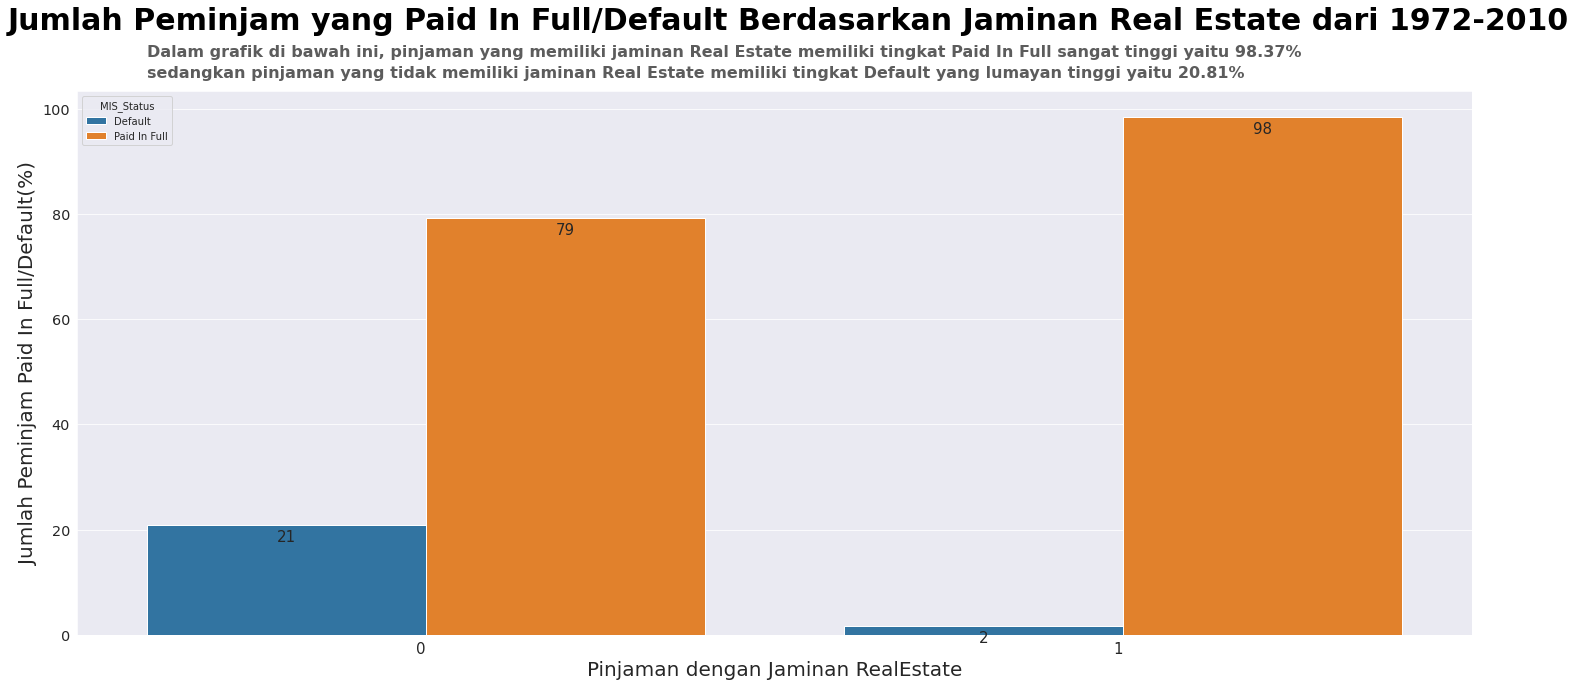

In [102]:
plt.figure(figsize=(25,10))
sns.set_style('darkgrid')
plotting = sns.barplot(x='RealEstate', y='PercentUniqueCustomerJaminan', hue='MIS_Status', data=dfs8);

for p in plotting.patches:
  plotting.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
  
plt.ylabel('Jumlah Peminjam Paid In Full/Default(%)', fontsize=20)
plt.xlabel('Pinjaman dengan Jaminan RealEstate', fontsize=20) 
plt.xticks(rotation=0, horizontalalignment='right', fontsize=15)

plotting.text(-0.6, 115, 'Jumlah Peminjam yang Paid In Full/Default Berdasarkan Jaminan Real Estate dari 1972-2010',color='black',fontsize=30,fontweight='bold')
plotting.text(-0.4, 110, "Dalam grafik di bawah ini, pinjaman yang memiliki jaminan Real Estate memiliki tingkat Paid In Full sangat tinggi yaitu 98.37%", fontsize=16, weight = 'bold', alpha = .75)
plotting.text(-0.4, 106, "sedangkan pinjaman yang tidak memiliki jaminan Real Estate memiliki tingkat Default yang lumayan tinggi yaitu 20.81%", fontsize=16, weight = 'bold', alpha = .75)

plt.show()

Pinjaman yang didukung dengan Real Estate atau aset lainnya sangat berpengaruh pada penerimaan pinjaman dan juga periode pinjaman yang dapat diberikan oleh Bank.

Berdasarkan dataset tersebut, pinjaman yang didukung oleh Real Estate berpotensi besar untuk disetujui dan memiliki periode lebih dari 20 tahun. Ini dapat memberikan jaminan kepada Bank jika di kemudian hari terjadi sesuatu yang tidak diinginkan.

##1.8.4 Jumlah peminjam Paid In Full/Default berdasarkan Periode Resesi

In [103]:
#Membuat kolom baru yang menunjukkan tahun pinjaman cair
df[['ApprovalDate', 'DisbursementDate','ChgOffDate']] = df[['ApprovalDate', 'DisbursementDate','ChgOffDate']].apply(pd.to_datetime)
df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

In [104]:
df['GreatRecession'] = np.where(((2007 <= df['DisbursementFY']) & (df['DisbursementFY'] <= 2009)), 1, 0)

In [105]:
dfs9 = df.groupby(['GreatRecession', 'MIS_Status'])['LoanNr_ChkDgt'].nunique().reset_index(name='UniqueCustomer4')
dfs10 = df.groupby(['GreatRecession'])['LoanNr_ChkDgt'].nunique().reset_index(name='AllUniqueCustomer4')

dfs11 = dfs9.merge(dfs10, how = 'inner', on='GreatRecession')
dfs11['PercentUniqueCustomerResesi']=round(dfs11['UniqueCustomer4']*100.0/dfs11['AllUniqueCustomer4'], 2) 

dfs11

,GreatRecession,MIS_Status,UniqueCustomer4,AllUniqueCustomer4,PercentUniqueCustomerResesi
0,0,Default,110739,769592,14.39
1,0,Paid In Full,658853,769592,85.61
2,1,Default,46819,127575,36.70
3,1,Paid In Full,80756,127575,63.30


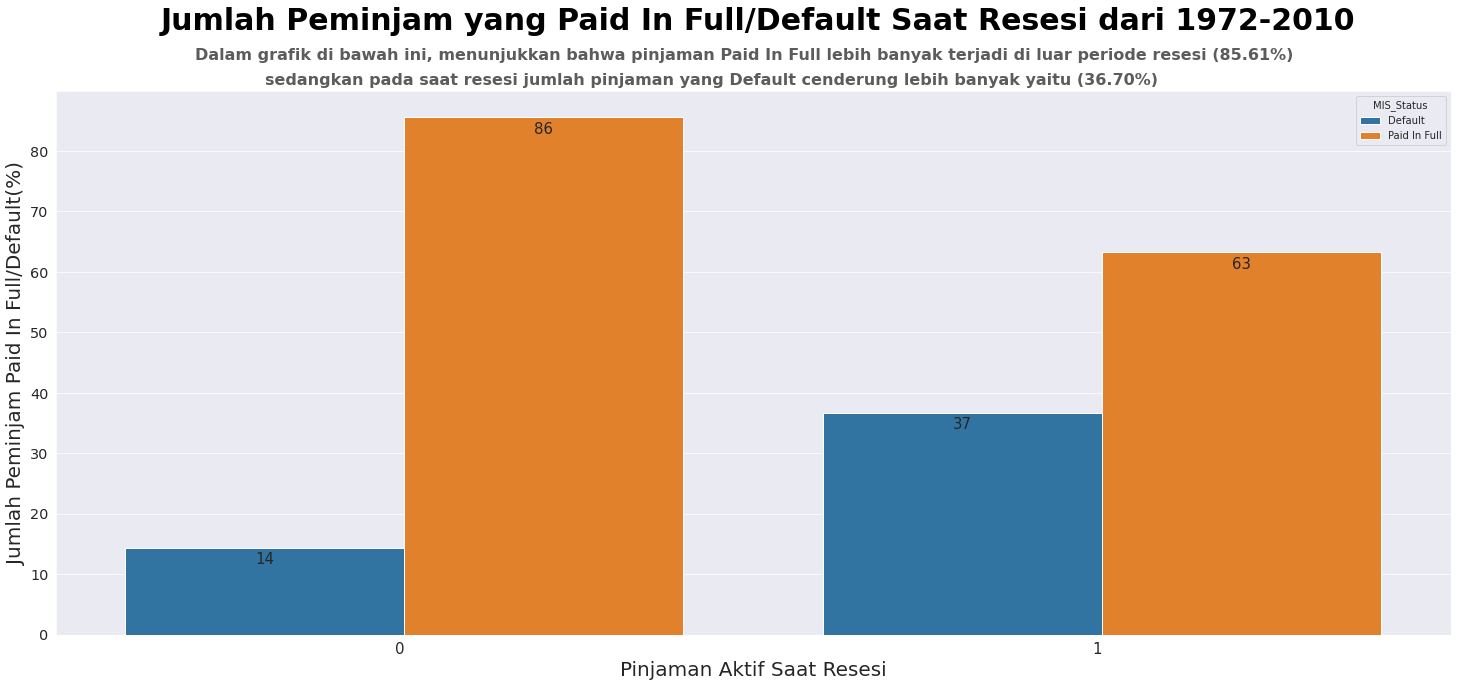

In [106]:
plt.figure(figsize=(25,10))
sns.set_style('darkgrid')
plotting = sns.barplot(x='GreatRecession', y='PercentUniqueCustomerResesi', hue='MIS_Status', data=dfs11);

for p in plotting.patches:
  plotting.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.ylabel('Jumlah Peminjam Paid In Full/Default(%)', fontsize=20)
plt.xlabel('Pinjaman Aktif Saat Resesi', fontsize=20) 
plt.xticks(rotation=0, horizontalalignment='right', fontsize=15)

plotting.text(-0.35, 100, 'Jumlah Peminjam yang Paid In Full/Default Saat Resesi dari 1972-2010',color='black',fontsize=30,fontweight='bold')
plotting.text(-0.3, 95, "Dalam grafik di bawah ini, menunjukkan bahwa pinjaman Paid In Full lebih banyak terjadi di luar periode resesi (85.61%)", fontsize=16, weight = 'bold', alpha = .75)
plotting.text(-0.2, 91, "sedangkan pada saat resesi jumlah pinjaman yang Default cenderung lebih banyak yaitu (36.70%)", fontsize=16, weight = 'bold', alpha = .75)

plt.show()

Berdasarkan data di atas, pinjaman yang terjadi selama masa resesi berpotensi lebih besar untuk terjadinya Charge Off. Hal ini dikarenakan kondisi ekonomi yang sedang tidak baik-baik saja sehingga berpengaruh kepada kegiatan bisnis mereka.

Oleh karena itu, saat kegiatan ekonomi sedang resesi atau tidak stabil, bisa dipertimbangkan lebih lanjut untuk menerima pinjaman sebuah bisnis berdasarkan aspek-aspek lainnya.

Trial & Error

Mengurangi noise pada data dengan cara mengganti value pada kolom `Name` yang memiliki frekuensi <=50 dengan value '**Others**'

In [107]:
df = pd.read_csv(file,low_memory=False)
pd.set_option('display.max_columns', None)

df_others = df.copy()
dfg = df_others.groupby(['Name'])['LoanNr_ChkDgt'].nunique().reset_index(name = 'counts').sort_values('counts',ascending = False)
dfg = dfg[dfg['counts']<=50]
dfmerged = pd.merge(df_others,dfg ,how ='left', on='Name')
dfmerged['Name'] = np.where(~(dfmerged['counts'].isnull()),'Others',dfmerged['Name'])
dff = dfmerged.drop('counts',axis=1)
dff['Name'].value_counts()


Others                    885796
SUBWAY                      1269
QUIZNO'S SUBS                433
COLD STONE CREAMERY          366
QUIZNO'S                     345
                           ...  
PHILLY CONNECTION             53
COUNTRY CLUTTER               53
KNIGHTS INN                   52
MERLE NORMAN COSMETICS        52
PEARLE VISION                 51
Name: Name, Length: 105, dtype: int64

# **FINISHED**



